## <i> ========== ⚽ FIFA 19 PLAYER PRICE PREDICTION AND ANALYSIS ⚽ ===========</i>

#### <i>========== Import Important Library File ==========</i>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

#### <i>========== Load The Dataset ========== </i>

In [2]:
df = pd.read_csv("footballData.csv")

In [3]:
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,24/06/1987,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,05/02/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,07/01/1993,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,21/08/1988,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,05/02/1992,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,13/04/1996,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,26/04/1999,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,28/06/2000,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,20/02/1997,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


#### <i>========== Dataset Overview ========== </i>

In [4]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


#### <i>========== Dropping All Useless Columns From The Dataset ==========</i>

In [5]:
# List of columns to drop
columns_to_drop = [
    'sofifa_id', 'player_url', 'short_name','real_face', 'release_clause_eur', 'loaned_from', 'joined', 'contract_valid_until',
    'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
    'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
    'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'  
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   long_name                   18944 non-null  object 
 1   age                         18944 non-null  int64  
 2   dob                         18944 non-null  object 
 3   height_cm                   18944 non-null  int64  
 4   weight_kg                   18944 non-null  int64  
 5   nationality                 18944 non-null  object 
 6   club_name                   18719 non-null  object 
 7   league_name                 18719 non-null  object 
 8   league_rank                 18719 non-null  float64
 9   overall                     18944 non-null  int64  
 10  potential                   18944 non-null  int64  
 11  value_eur                   18944 non-null  int64  
 12  wage_eur                    18944 non-null  int64  
 13  player_positions            189

# <i>Player Data Overview</i>

## <i>🧑‍💼 **Player Details**</i>
- **long_name**: Player's full name.
- **age**: Player's age (years).
- **dob**: Date of birth.
- **height_cm**: Height in centimeters.
- **weight_kg**: Weight in kilograms.
- **nationality**: Player's nationality.

## <i>⚽ **Club Information**</i>
- **club_name**: Name of the club.
- **league_name**: Name of the league.
- **league_rank**: Club's rank in the league.

## <i>📈 **Player Ratings**</i>
- **overall**: Overall rating of the player.
- **potential**: Potential rating of the player.
- **value_eur**: Market value in euros.
- **wage_eur**: Wage in euros.

## <i>🎯 **Playing Attributes**</i>
- **player_positions**: Positions the player can play.
- **preferred_foot**: Player's preferred foot (left or right).
- **international_reputation**: Reputation on the international stage.
- **weak_foot**: Skill rating for the weaker foot.
- **skill_moves**: Skill rating for dribbling and tricks.
- **work_rate**: Work rate on the field.
- **body_type**: Physical body type.

## <i>🏆 **Player Statistics**</i>
- **pace**: Speed rating.
- **shooting**: Shooting accuracy rating.
- **passing**: Passing accuracy rating.
- **dribbling**: Dribbling skill rating.
- **defending**: Defensive skill rating.
- **physic**: Physical attributes rating.

## <i>🧤 **Goalkeeping Attributes** </i>
- **gk_diving**: Diving ability rating.
- **gk_handling**: Handling ability rating.
- **gk_kicking**: Kicking ability rating.
- **gk_reflexes**: Reflexes rating.
- **gk_speed**: Speed rating.
- **gk_positioning**: Positioning ability rating.

## <i>📝 **Player Traits**</i>
- **player_traits**: Traits or special characteristics.

## <i>🔥 **Attacking Skills**</i>
- **attacking_crossing**: Rating for crossing in attack.
- **attacking_finishing**: Rating for finishing in attack.
- **attacking_heading_accuracy**: Rating for heading accuracy.
- **attacking_short_passing**: Rating for short passing.
- **attacking_volleys**: Rating for volleys.

## <i>🎨 **Skill Attributes**</i>
- **skill_dribbling**: Rating for dribbling skills.
- **skill_curve**: Rating for ball curve skills.
- **skill_fk_accuracy**: Rating for free kick accuracy.
- **skill_long_passing**: Rating for long passing accuracy.
- **skill_ball_control**: Rating for ball control.

## <i>🚀 **Movement Skills**</i>
- **movement_acceleration**: Rating for acceleration.
- **movement_sprint_speed**: Rating for sprint speed.
- **movement_agility**: Rating for agility.
- **movement_reactions**: Rating for reactions.
- **movement_balance**: Rating for balance.

## <i>💪 **Power Attributes**</i>
- **power_shot_power**: Rating for shot power.
- **power_jumping**: Rating for jumping ability.
- **power_stamina**: Rating for stamina.
- **power_strength**: Rating for physical strength.
- **power_long_shots**: Rating for long shot accuracy.

## <i>🧠 **Mental Attributes**</i>
- **mentality_aggression**: Rating for aggression.
- **mentality_interceptions**: Rating for interceptions.
- **mentality_positioning**: Rating for positioning.
- **mentality_vision**: Rating for vision.
- **mentality_penalties**: Rating for penalties.
- **mentality_composure**: Rating for composure.

## <i>🛡️ **Defending Skills**</i>
- **defending_marking**: Rating for marking in defense.
- **defending_standing_tackle**: Rating for standing tackles.
- **defending_sliding_tackle**: Rating for sliding tackles.

## 🚫<i> **Additional Goalkeeping Attributes**</i>
- **goalkeeping_diving**: Rating for diving.
- **goalkeeping_handling**: Rating for handling.
- **goalkeeping_kicking**: Rating for kicking.
- **goalkeeping_positioning**: Rating for positioning.
- **goalkeeping_reflexes**: Rating for reflexes.


### <i> ========== Preprocessing Of Dataset  ==========</i>

In [6]:
# Check for missing values in each column
print("\nMissing Values Count in Each Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values Count in Each Column:
club_name                 225
league_name               225
league_rank               225
player_tags             17536
team_position             225
team_jersey_number        225
nation_position         17817
nation_jersey_number    17817
pace                     2083
shooting                 2083
passing                  2083
dribbling                2083
defending                2083
physic                   2083
gk_diving               16861
gk_handling             16861
gk_kicking              16861
gk_reflexes             16861
gk_speed                16861
gk_positioning          16861
player_traits           10629
defending_marking       18944
dtype: int64


### <i>========== Dropping Those Columns More Then 50% Missing Values ==========</i>

In [7]:
# Drop columns with too many missing values (e.g., more than 50% missing)
threshold = 0.5  # Adjust the threshold as needed
missing_percentage = df.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
print("\nDropped columns with too many missing values:")
columns_to_drop


Dropped columns with too many missing values:


Index(['player_tags', 'nation_position', 'nation_jersey_number', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'defending_marking'],
      dtype='object')

In [9]:
# Impute missing values for numeric columns
numeric_columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for col in numeric_columns:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

## <i>  Breakdown of the Code </i>
### <i> Define Numeric Columns </i>

- `numeric_columns` is a list containing the names of numeric columns that may have missing values. These columns are:
  - `pace`
  - `shooting`
  - `passing`
  - `dribbling`
  - `defending`
  - `physic`

### <i>Loop Through Each Column</i>

- A `for` loop is used to iterate over each column name in the `numeric_columns` list. This allows us to apply the same imputation process to each column individually.

### <i>Check Column Existence</i>

- `if col in df.columns:` checks whether the current column exists in the DataFrame `df`. This step is crucial as it prevents errors that might occur if we try to impute missing values in columns that are not present in the DataFrame.

### <i>Impute Missing Values</i>

- `df[col].fillna(df[col].median(), inplace=True)` performs the following actions:
  - `df[col].median()` computes the median value of the column. The median is used here as it is a robust measure of central tendency, which helps in maintaining the statistical properties of the data.
  - `df[col].fillna(...)` replaces any missing values (`NaN`) in the column with the computed median value.
  - `inplace=True` ensures that the changes are applied directly to the DataFrame `df`, modifying it in place without creating a new DataFrame.

### <i>Summary</i>

The code snippet handles missing values in numeric columns by replacing `NaN` values with the median of the respective columns. This approach is effective in preserving the statistical integrity of the data while addressing the issue of missing values.


In [10]:
# Impute missing values for goalkeeping columns
gk_columns = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
for col in gk_columns:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

## <i> Breakdown of the Code</i>

### <i>Define Goalkeeping Columns</i>

- `gk_columns` is a list that includes the names of columns related to goalkeeping skills which may have missing values. The columns are:
  - `gk_diving`
  - `gk_handling`
  - `gk_kicking`
  - `gk_reflexes`
  - `gk_speed`
  - `gk_positioning`

### <i>Loop Through Each Column</i>

- A `for` loop is employed to iterate over each column name in the `gk_columns` list. This approach ensures that the missing value imputation is carried out for each column individually.

### <i>Check Column Existence</i>

- `if col in df.columns:` verifies whether the current column exists in the DataFrame `df`. This check is crucial to prevent errors that could occur if attempting to impute missing values in columns that are not part of the DataFrame.

### <i>Impute Missing Values</i>

- `df[col].fillna(df[col].median(), inplace=True)` performs the following operations:
  - `df[col].median()` computes the median value of the column. The median is preferred here because it is a robust statistic that is less sensitive to outliers compared to the mean.
  - `df[col].fillna(...)` replaces any missing values (`NaN`) in the column with the median value calculated.
  - `inplace=True` updates the DataFrame `df` directly, ensuring that the changes are applied to the existing DataFrame without creating a new one.

### <i> Summary </i>

The provided code snippet addresses missing data in goalkeeping-related columns by replacing `NaN` values with the median of each column. This method helps to maintain the integrity of the data and ensures that the dataset remains statistically consistent.


In [11]:
# Impute missing values for categorical columns
categorical_impute = {
    'club_name': 'Unknown',
    'league_name': 'Unknown',
    'team_position': 'Unknown',
    'nation_position': 'Unknown',
    'player_tags': 'None',
    'nation_jersey_number': 0,
    'team_jersey_number': 0,
    'player_traits': 'None'
}

for col, value in categorical_impute.items():
    if col in df.columns:
        df[col].fillna(value, inplace=True)

print("\nMissing values imputation complete.")


Missing values imputation complete.


## <i>Breakdown of Imputing Missing Values for Categorical Columns</i>

### <i>Define Imputation Values</i>

- **`categorical_impute`** is a dictionary used to specify how to fill in missing values for different columns in the DataFrame:
  - **Keys**: Represent the names of columns that may have missing values.
  - **Values**: Represent the specific value that will replace any missing entries (`NaN`) in those columns.

  Here are the columns and their respective imputation values:
  - `club_name`: 'Unknown'
  - `league_name`: 'Unknown'
  - `team_position`: 'Unknown'
  - `nation_position`: 'Unknown'
  - `player_tags`: 'None'
  - `nation_jersey_number`: 0
  - `team_jersey_number`: 0
  - `player_traits`: 'None'

### <i>Loop Through Each Column</i>

- The `for` loop iterates over each key-value pair in the `categorical_impute` dictionary:
  - **`col`**: Represents the name of the column to be processed.
  - **`value`**: Represents the value to be used for filling missing entries in that column.

### <i>Check Column Existence</i>

- **`if col in df.columns:`**: This condition checks whether the current column (`col`) exists in the DataFrame `df`. This step ensures that the code does not attempt to impute values in columns that are not present, thus preventing potential errors.

### <i>Impute Missing Values</i>

- **`df[col].fillna(value, inplace=True)`** performs the following:
  - **`df[col].fillna(value)`**: Replaces any missing values (`NaN`) in the specified column with the provided imputation value (`value`).
  - **`inplace=True`**: Applies the changes directly to the original DataFrame `df`, rather than creating a new DataFrame. This means the DataFrame `df` is updated with the imputed values.

### <i>Completion Message</i>

- **`print("\nMissing values imputation complete.")`**: Prints a message indicating that the process of imputing missing values has been successfully completed for all the columns specified in the `categorical_impute` dictionary.

### <i>Summary</i>

This code snippet efficiently handles missing values in categorical columns by replacing `NaN` values with predefined values. This method ensures that the DataFrame remains complete and is prepared for subsequent analysis or modeling tasks.


In [12]:
# Impute remaining missing values for 'league_rank'
if 'league_rank' in df.columns:
    df['league_rank'].fillna(df['league_rank'].median(), inplace=True)

print("\nMissing values imputation complete.")


Missing values imputation complete.


## <i>Imputing Missing Values for 'league_rank'</i>

### <i> Check Column Existence</i>

- **`if 'league_rank' in df.columns:`**
  - This condition checks if the column `'league_rank'` is present in the DataFrame `df`.
  - This step ensures that the imputation process is only attempted if the column exists, thereby preventing errors that could occur if the column were absent.

### <i>Impute Missing Values</i>

- **`df['league_rank'].fillna(df['league_rank'].median(), inplace=True):`**
  - **`df['league_rank'].median():`** Calculates the median value of the `'league_rank'` column. The median is chosen for its robustness as a measure of central tendency, as it is less influenced by outliers compared to the mean.
  - **`df['league_rank'].fillna(...):`** Replaces any missing values (`NaN`) in the `'league_rank'` column with the median value computed from the column.
  - **`inplace=True:`** Ensures that the changes are applied directly to the DataFrame `df`, modifying it in place without creating a new DataFrame.

### <i>Completion Message</i>

- **`print("\nMissing values imputation complete."):`**
  - This statement outputs a message indicating that the imputation process for the `'league_rank'` column has been successfully completed.

### <i> Summary</i>

The provided code snippet efficiently handles any remaining missing values in the `'league_rank'` column by filling `NaN` entries with the median of the column. This approach ensures that the DataFrame is complete and ready for further analysis or modeling.


In [13]:
# Check for missing values again
missing_values = df.isnull().sum()

# Filter out columns that still have missing values
columns_with_missing = missing_values[missing_values > 0]

# Print out columns with missing values
if not columns_with_missing.empty:
    print("\nColumns with Remaining Missing Values:")
    print(columns_with_missing)
else:
    print("\nNo columns have missing values.")


No columns have missing values.


## <i>Breakdown and Summary</i>

### <i> Breakdown </i>

- **`missing_values = df.isnull().sum():`**
  - Computes the total number of missing values for each column in the DataFrame.

- **`columns_with_missing = missing_values[missing_values > 0]:`**
  - Filters out columns that still have missing values by selecting only those with a count greater than zero.

- **`if not columns_with_missing.empty:`**
  - Checks if there are any columns with missing values. If there are, it prints the columns with missing values. If no columns have missing values, it prints a message indicating that all columns are complete.

### <i>Summary</i>

This code snippet identifies and reports any remaining missing values in the DataFrame. It helps ensure that the dataset is complete and ready for further analysis or modeling.


In [14]:
df

,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,Lionel Andrés Messi Cuccittini,33,24/06/1987,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo dos Santos Aveiro,35,05/02/1985,187,83,Portugal,Juventus,Italian Serie A,1.0,92,...,82,84,95,32,24,7,11,15,14,11
2,Jan Oblak,27,07/01/1993,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,...,65,11,68,12,18,87,92,78,90,90
3,Robert Lewandowski,31,21/08/1988,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,...,79,88,88,42,19,15,6,12,8,10
4,Neymar da Silva Santos Júnior,28,05/02/1992,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,...,90,92,93,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,Kevin Angulo,24,13/04/1996,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,...,49,39,36,39,54,10,9,14,6,6
18940,Mengxuan Zhang,21,26/04/1999,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,...,25,35,40,56,47,12,13,8,14,6
18941,王政豪,20,28/06/2000,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,...,25,35,40,55,45,12,9,14,15,13
18942,Zitong Chen,23,20/02/1997,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,...,45,42,43,49,45,15,7,7,5,13


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   long_name                   18944 non-null  object 
 1   age                         18944 non-null  int64  
 2   dob                         18944 non-null  object 
 3   height_cm                   18944 non-null  int64  
 4   weight_kg                   18944 non-null  int64  
 5   nationality                 18944 non-null  object 
 6   club_name                   18944 non-null  object 
 7   league_name                 18944 non-null  object 
 8   league_rank                 18944 non-null  float64
 9   overall                     18944 non-null  int64  
 10  potential                   18944 non-null  int64  
 11  value_eur                   18944 non-null  int64  
 12  wage_eur                    18944 non-null  int64  
 13  player_positions            189

In [16]:
# Step 1: Identify Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("\nCategorical Columns in the DataFrame:")
categorical_columns


Categorical Columns in the DataFrame:


Index(['long_name', 'dob', 'nationality', 'club_name', 'league_name',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'team_position'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Initialize LabelEncoder
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    # Fit and transform the data
    df[col + '_encoded'] = label_encoders[col].fit_transform(df[col])


## <i> Label Encoding Categorical Columns</i>

###  <i>Breakdown</i>

- **`from sklearn.preprocessing import LabelEncoder:`**
  - Imports the `LabelEncoder` class from the `sklearn.preprocessing` module. `LabelEncoder` is used to convert categorical variables into numerical values.

- **`label_encoders = {}`**
  - Initializes an empty dictionary called `label_encoders` to store `LabelEncoder` instances for each categorical column.

- **`for col in categorical_columns:`**
  - Iterates over each column name in the list `categorical_columns`. These are the columns in the DataFrame that will be encoded.

- **`label_encoders[col] = LabelEncoder():`**
  - Creates a new instance of `LabelEncoder` for the current column (`col`) and stores it in the `label_encoders` dictionary. This instance will be used to encode the categorical values in that column.

- **`df[col + '_encoded'] = label_encoders[col].fit_transform(df[col]):`**
  - **`fit_transform(df[col])`**: Fits the `LabelEncoder` on the data of the current column (`df[col]`) and transforms the categorical values into numerical values.
  - **`df[col + '_encoded']`**: Creates a new column in the DataFrame with the suffix `_encoded` added to the original column name. This new column contains the encoded numerical values.

### <i>Summary</i>

This code snippet performs label encoding on categorical columns in a DataFrame. It initializes a `LabelEncoder` for each categorical column, applies the encoding, and stores the results in new columns. This transformation converts categorical data into numerical format, which is necessary for machine learning algorithms.


In [18]:
# Step 3: Show the DataFrame with new encoded columns
print("\nDataFrame with Encoded Columns:")
df.head()


DataFrame with Encoded Columns:


,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,...,long_name_encoded,dob_encoded,nationality_encoded,club_name_encoded,league_name_encoded,player_positions_encoded,preferred_foot_encoded,work_rate_encoded,body_type_encoded,team_position_encoded
0,Lionel Andrés Messi Cuccittini,33,24/06/1987,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,...,10345,4804,6,214,42,539,0,7,4,0
1,Cristiano Ronaldo dos Santos Aveiro,35,05/02/1985,187,83,Portugal,Juventus,Italian Serie A,1.0,92,...,3338,871,123,339,25,587,1,1,1,13
2,Jan Oblak,27,07/01/1993,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,...,7613,1280,137,64,42,213,1,8,17,5
3,Robert Lewandowski,31,21/08/1988,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,...,14732,4236,122,216,20,560,1,2,33,27
4,Neymar da Silva Santos Júnior,28,05/02/1992,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,...,13009,877,20,451,18,331,1,2,6,14


### <i> =======Expolatory Data Analysis (EDA) & Visulization ======== </i>

<Figure size 1800x1800 with 0 Axes>

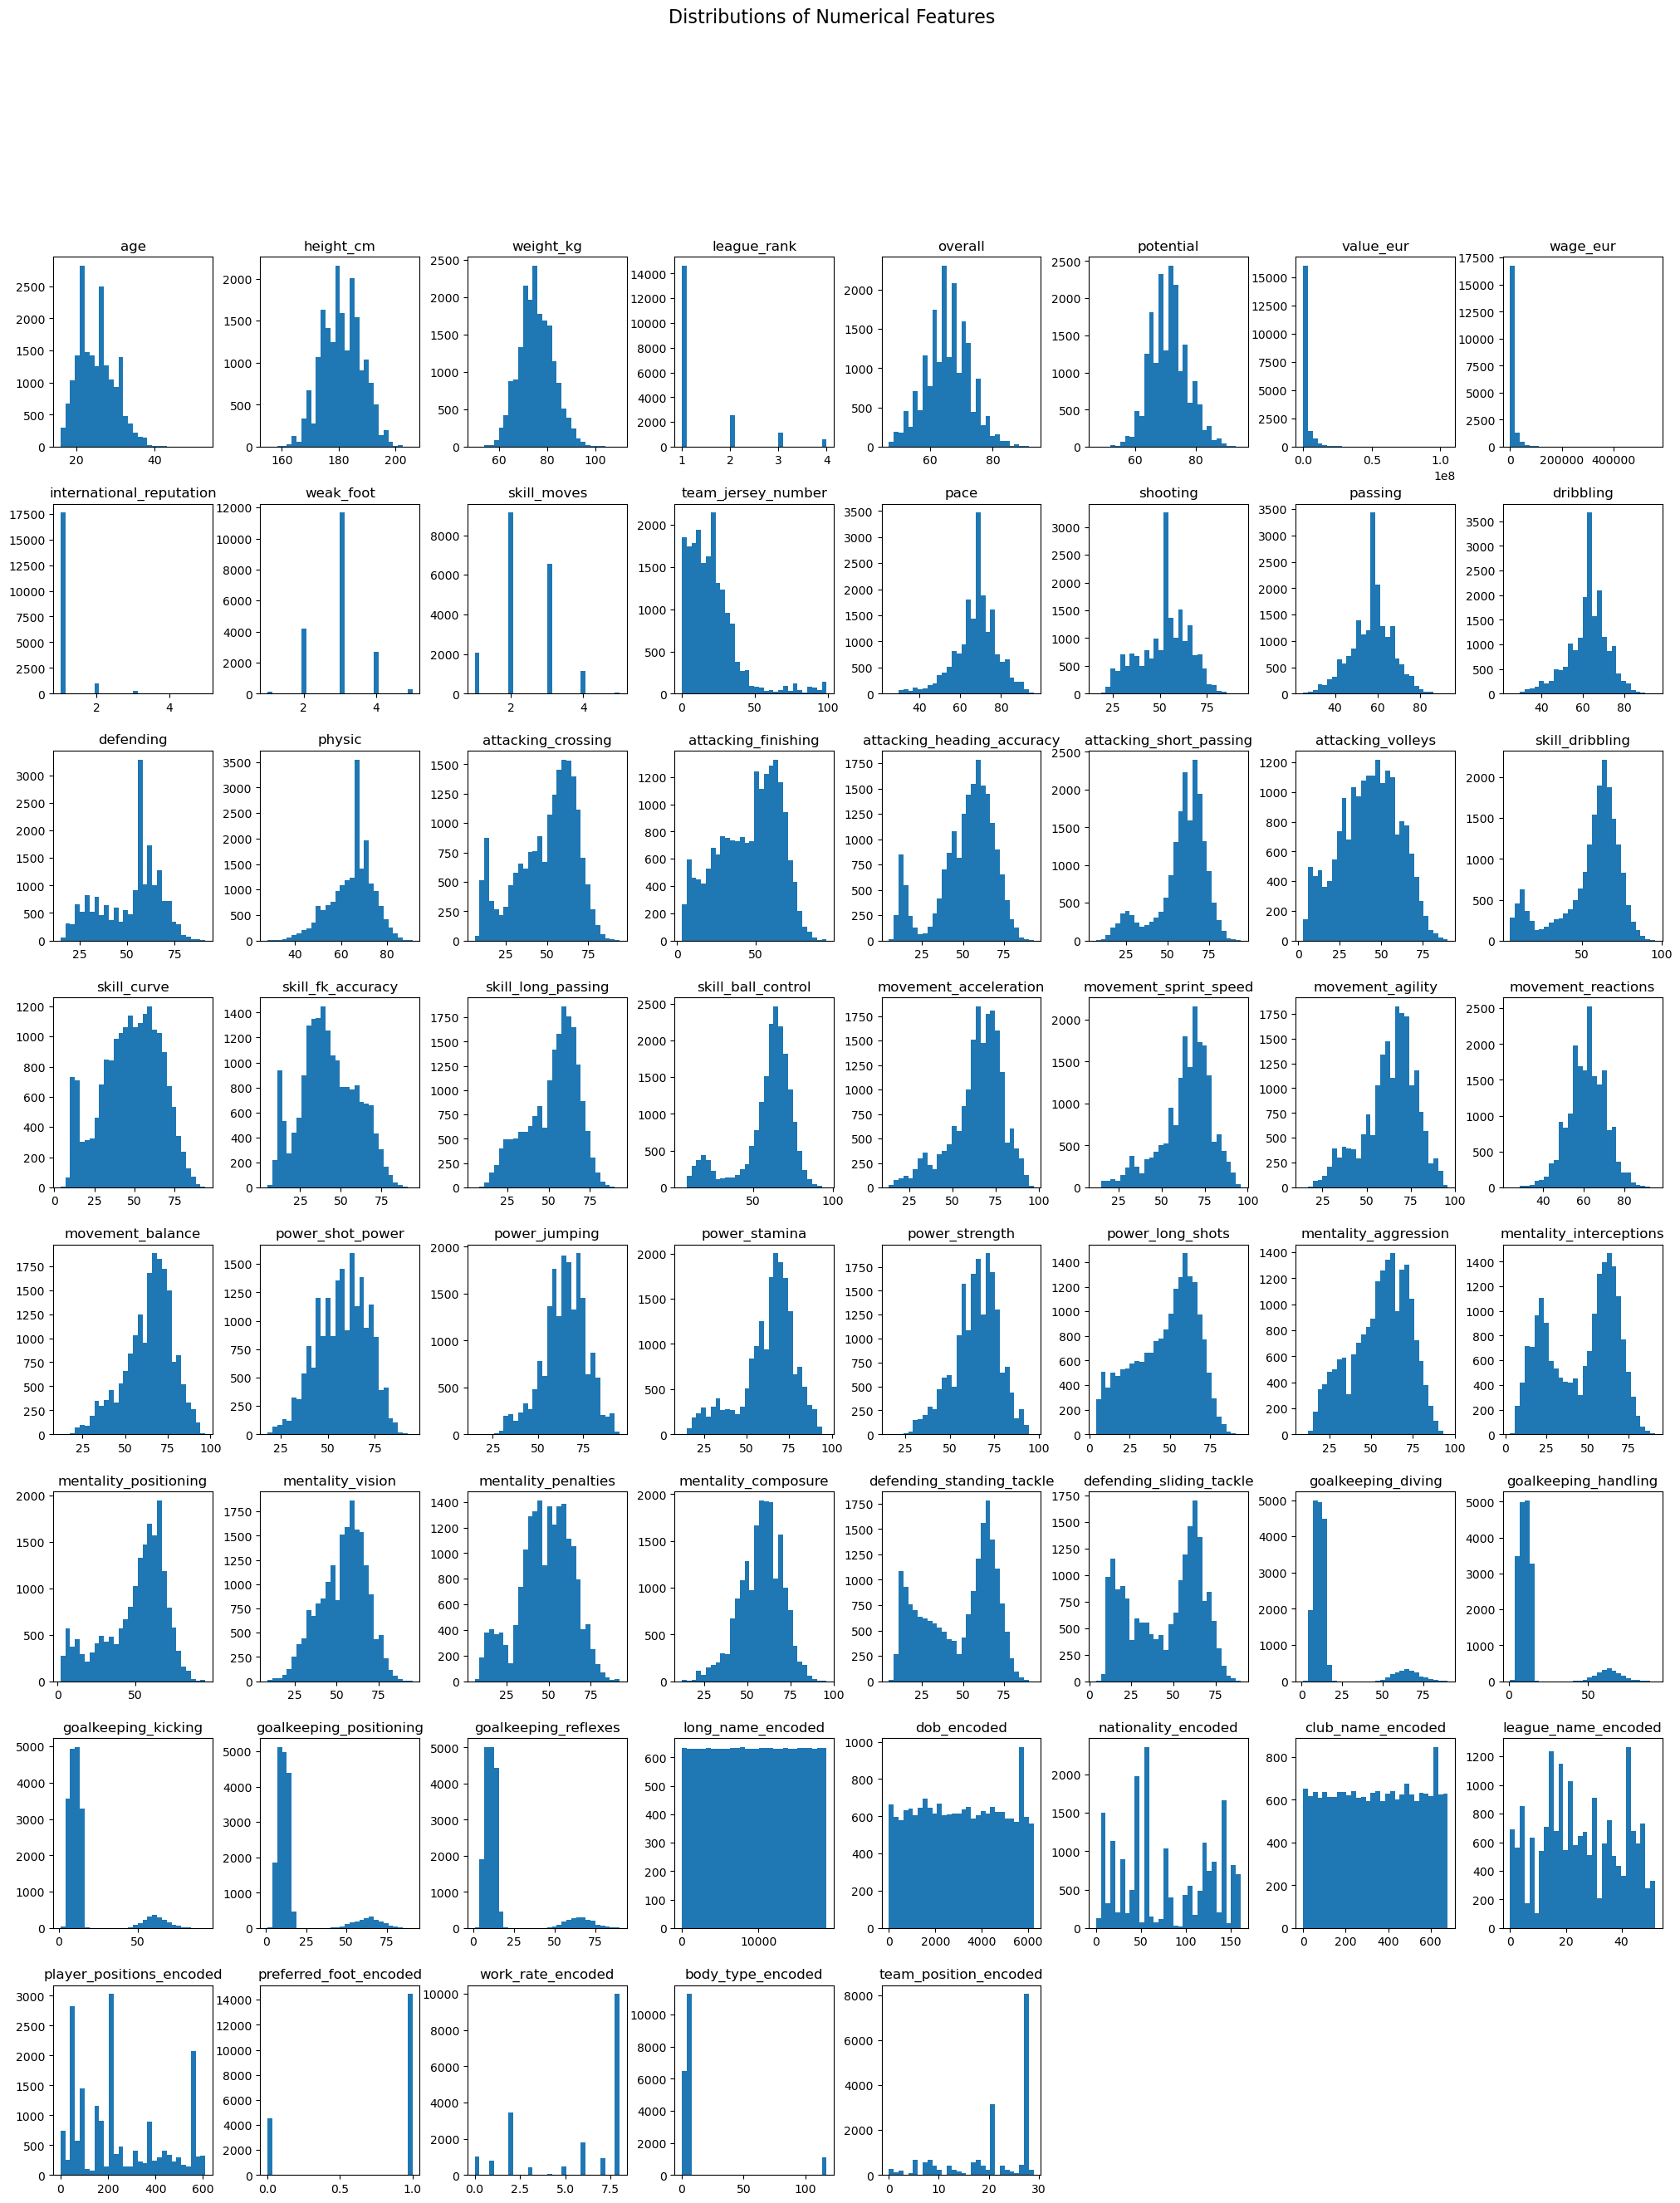

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Data Distribution
plt.figure(figsize=(18, 18))
df.hist(bins=30, figsize=(25, 30), grid=False)
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()

### <i>========== Analysis Of Countries ==========</i>

### ========== <i> Top 10 Countries With Most Players Under 25 ========== </i>

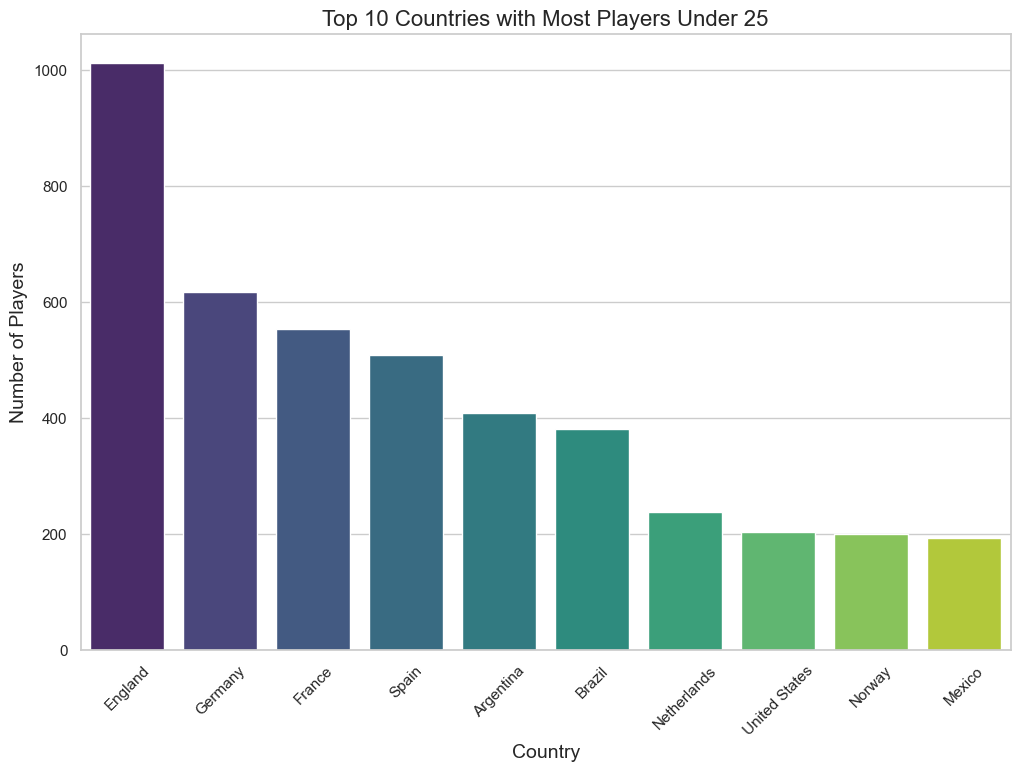

In [20]:
# Set the style for the plots
sns.set(style='whitegrid')

# Filter the dataset for players under 25
young_players = df[df['age'] < 25]

# Count the number of players per country
country_counts = young_players['nationality'].value_counts()

# Get the top 10 countries with the most players under 25
top_10_countries = country_counts.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Players Under 25', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.show()

###  <i>========== Top 5 Countries With Most Players Aged 20-25 ==========</i>

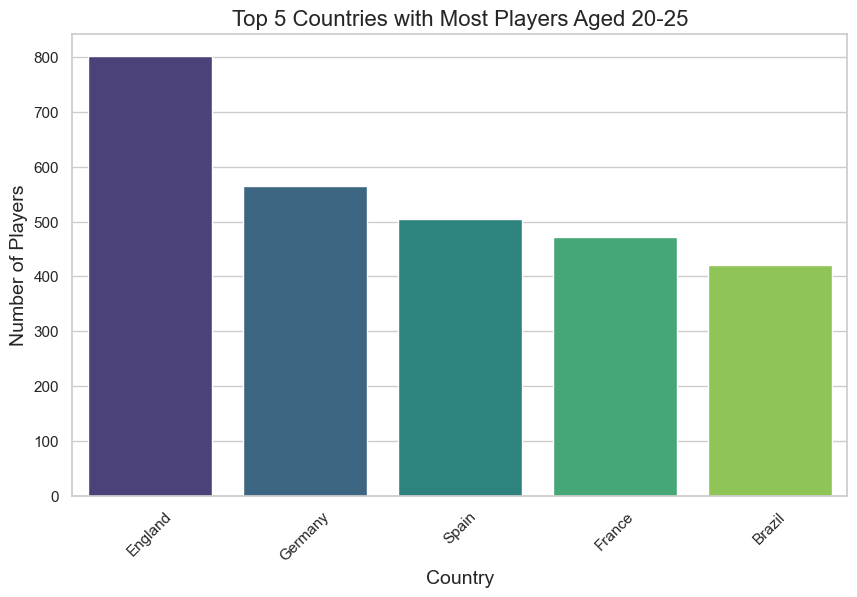

In [21]:
# Set the style for the plots
sns.set(style='whitegrid')

# Filter the dataset for players between the ages of 20 and 25
players_20_25 = df[(df['age'] >= 20) & (df['age'] <= 25)]

# Count the number of players per country
country_counts = players_20_25['nationality'].value_counts()

# Get the top 5 countries with the most players between ages 20 and 25
top_5_countries = country_counts.head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')
plt.title('Top 5 Countries with Most Players Aged 20-25', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.show()

###  <i> ========== Top 5 Countries With Most Clubs ========== </i>

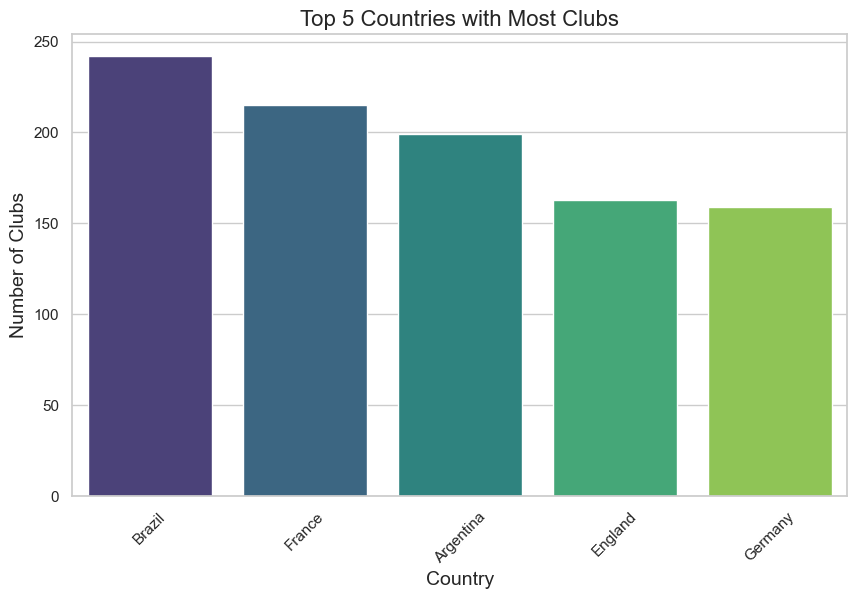

In [22]:
# Set the style for the plots
sns.set(style='whitegrid')

# Count the number of unique clubs per country
clubs_per_country = df.groupby('nationality')['club_name'].nunique()

# Get the top 5 countries with the most clubs
top_5_countries_clubs = clubs_per_country.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries_clubs.index, y=top_5_countries_clubs.values, palette='viridis')
plt.title('Top 5 Countries with Most Clubs', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Clubs', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### <i>========== Top 15 Countries With Most Players ==========</i>

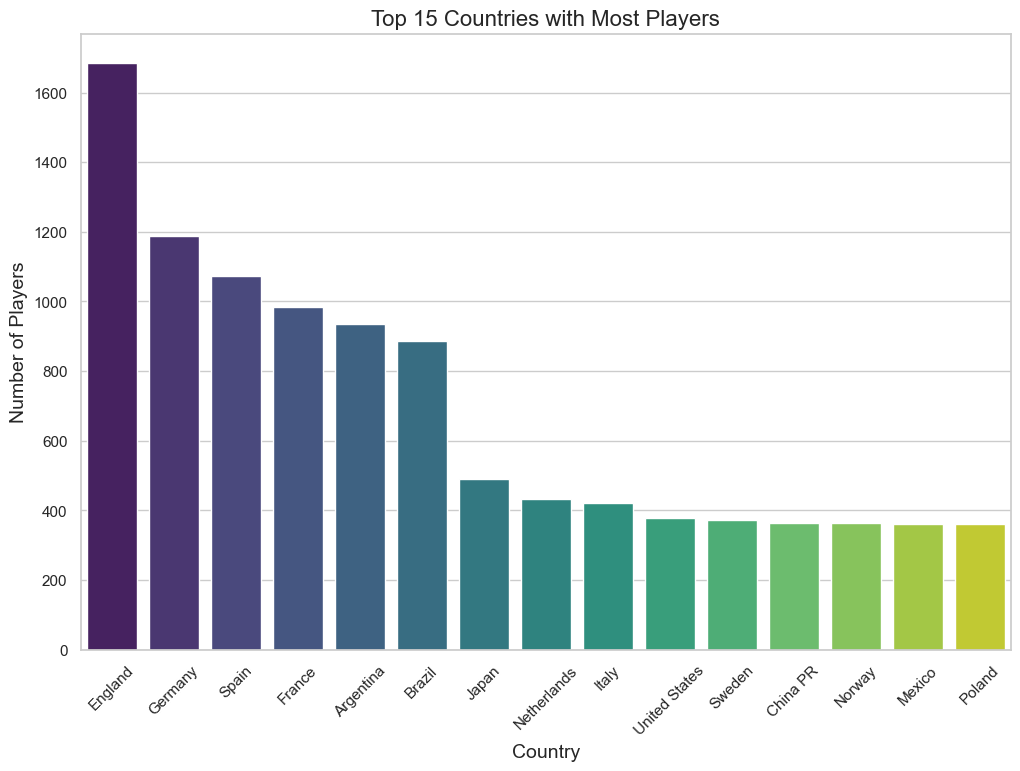

In [23]:
# Set the style for the plots
sns.set(style='whitegrid')

# Count the number of players per country
players_per_country = df['nationality'].value_counts()

# Get the top 15 countries with the most players
top_15_countries = players_per_country.head(15)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_countries.index, y=top_15_countries.values, palette='viridis')
plt.title('Top 15 Countries with Most Players', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.show()

###  <i>========== Top 10 Countries With Most Expensive Player ==========</i>

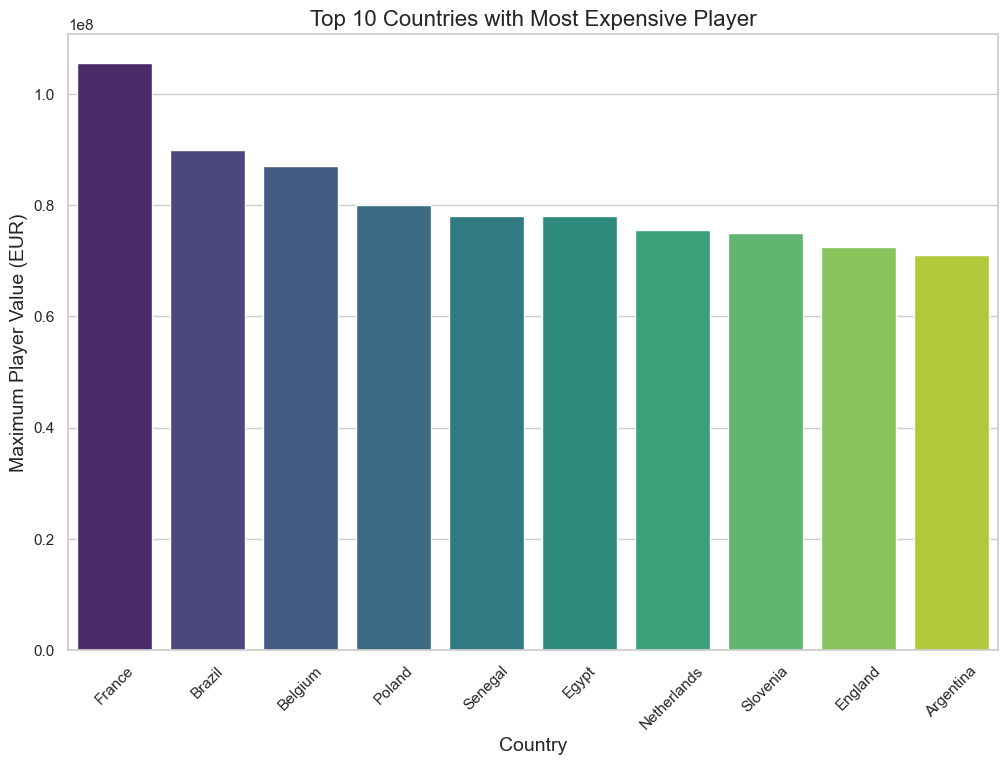

In [24]:
# Set the style for the plots
sns.set(style='whitegrid')

# Find the most expensive player per country
most_expensive_player_per_country = df.groupby('nationality')['value_eur'].max()

# Get the top 10 countries with the most expensive player
top_10_countries_expensive_player = most_expensive_player_per_country.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries_expensive_player.index, y=top_10_countries_expensive_player.values, palette='viridis')
plt.title('Top 10 Countries with Most Expensive Player', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Maximum Player Value (EUR)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


### ========== <i> Top 3 Countries With Most Leagues ========== </i>

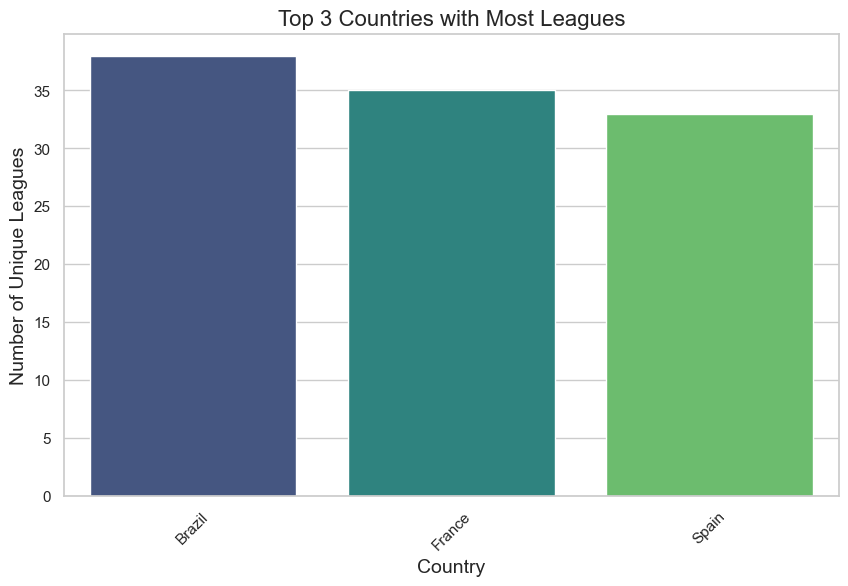

In [25]:
# Set the style for the plots
sns.set(style='whitegrid')

# Count the number of unique leagues per country
leagues_per_country = df.groupby('nationality')['league_name'].nunique()

# Get the top 3 countries with the most leagues
top_3_countries_leagues = leagues_per_country.sort_values(ascending=False).head(3)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_countries_leagues.index, y=top_3_countries_leagues.values, palette='viridis')
plt.title('Top 3 Countries with Most Leagues', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Unique Leagues', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### <i>========== Analysis On Players Across All Columns ==========</i>

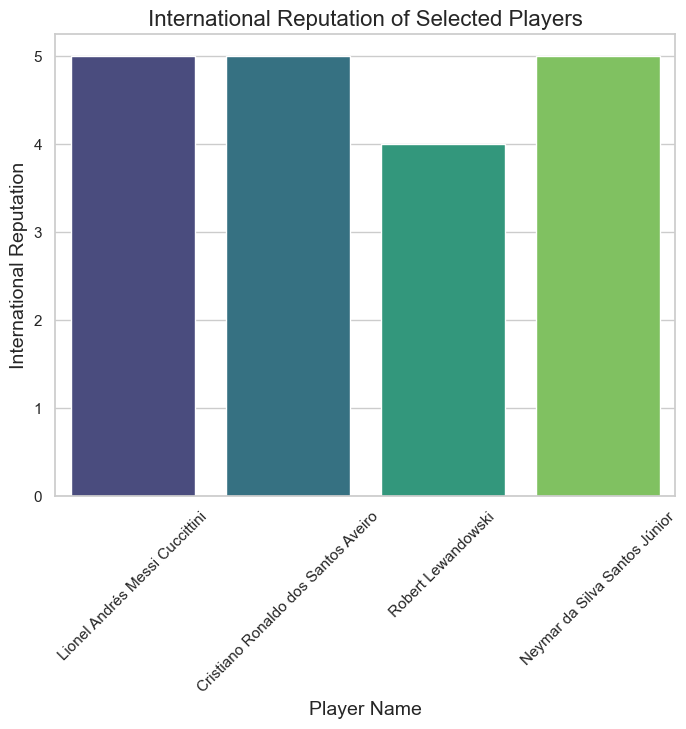

In [26]:
# List of player names of interest
players_of_interest = [
    'Lionel Andrés Messi Cuccittini', 
    'Cristiano Ronaldo dos Santos Aveiro', 
    'Neymar da Silva Santos Júnior', 
    'Robert Lewandowski'
]

# Filter the dataset for these players
players_df = df[df['long_name'].isin(players_of_interest)]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='long_name', y='international_reputation', data=players_df, palette='viridis')
plt.title('International Reputation of Selected Players', fontsize=16)
plt.xlabel('Player Name', fontsize=14)
plt.ylabel('International Reputation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### <i>========== Attacking Attributes Rader Chart ==========</i>

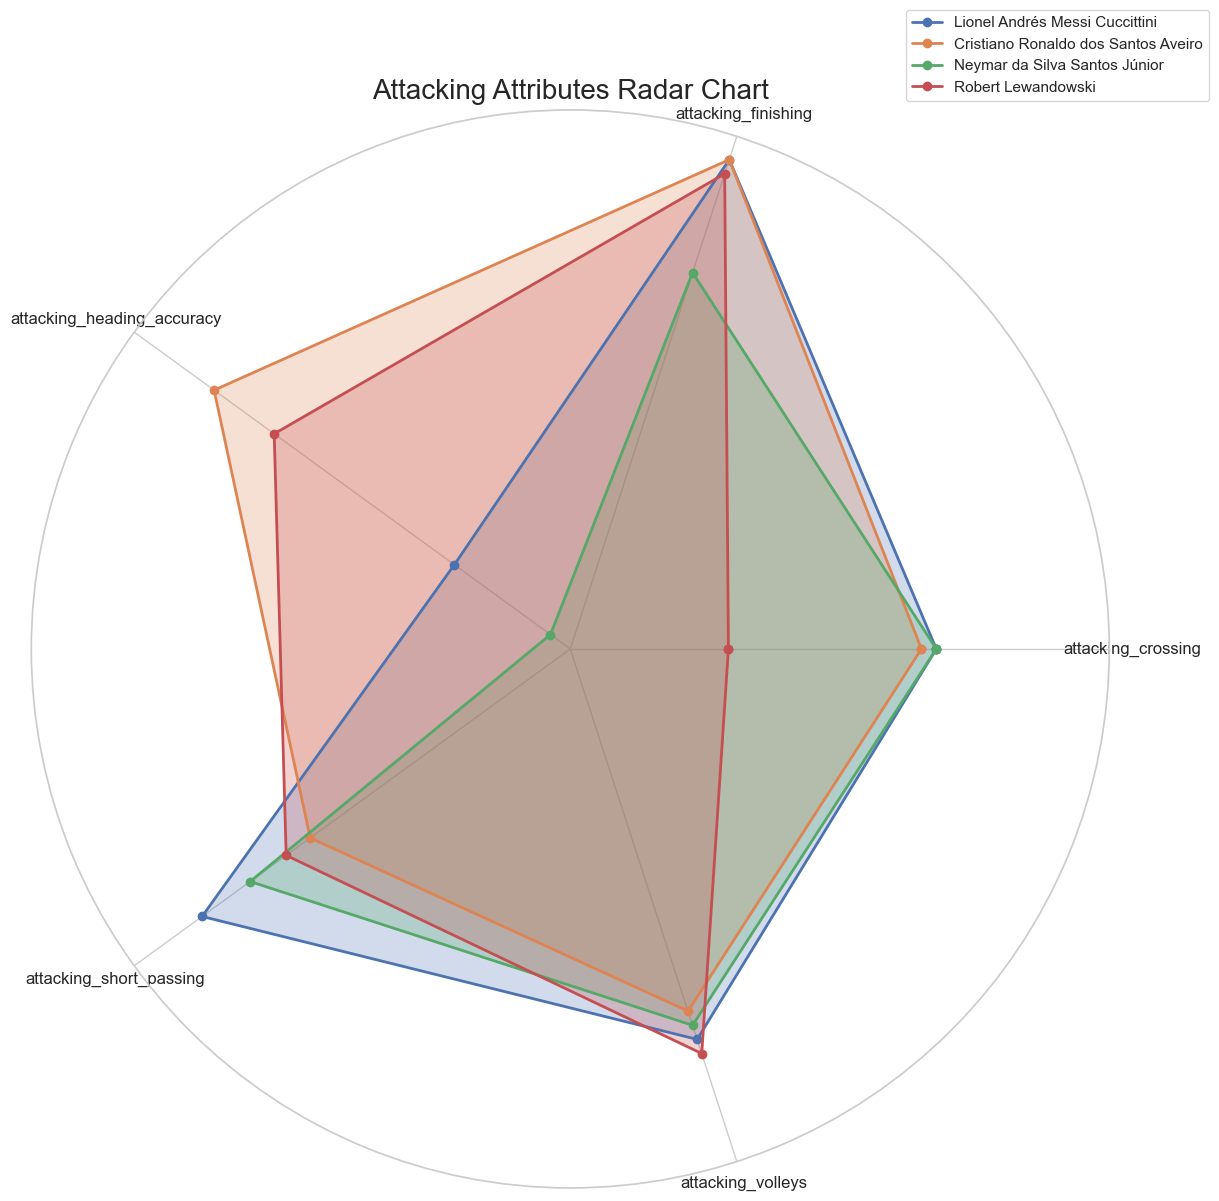

In [27]:
from math import pi

# List of player names of interest
players_of_interest = [
    'Lionel Andrés Messi Cuccittini', 
    'Cristiano Ronaldo dos Santos Aveiro', 
    'Neymar da Silva Santos Júnior', 
    'Robert Lewandowski'
]

# Filter the dataset for these players
players_df = df[df['long_name'].isin(players_of_interest)]

# Select relevant columns for attacking attributes
attacking_attributes = [
    'attacking_crossing',
    'attacking_finishing',
    'attacking_heading_accuracy',
    'attacking_short_passing',
    'attacking_volleys'
]

# Prepare data for radar chart
def get_radar_data(df, players, attributes):
    data = {}
    for player in players:
        player_data = df[df['long_name'] == player][attributes].values.flatten()
        data[player] = player_data
    return data

def plot_radar_chart(data, attributes):
    num_vars = len(attributes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))
    
    for player, values in data.items():
        values = np.concatenate((values, [values[0]]))
        ax.plot(angles, values, label=player, linewidth=2, linestyle='solid', marker='o')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=12)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title('Attacking Attributes Radar Chart', fontsize=20)
    plt.show()

# Get radar data
radar_data = get_radar_data(players_df, players_of_interest, attacking_attributes)

# Plot radar chart
plot_radar_chart(radar_data, attacking_attributes)

###  <i>========== Skill Attributes Radar Chart ========== </i>

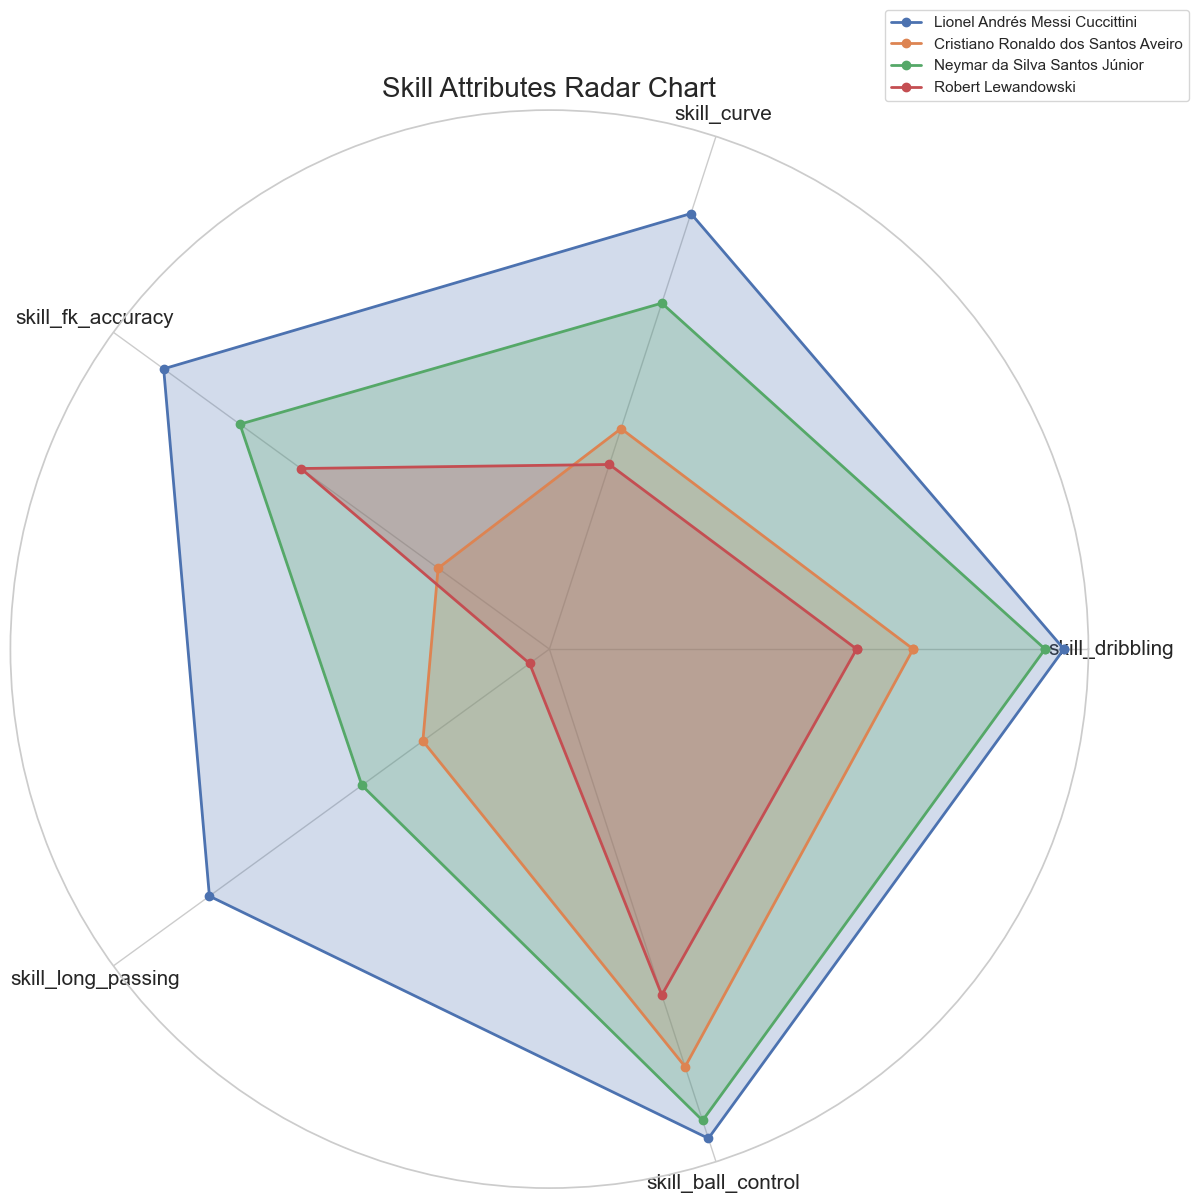

In [28]:
# List of player names of interest
players_of_interest = [
    'Lionel Andrés Messi Cuccittini', 
    'Cristiano Ronaldo dos Santos Aveiro', 
    'Neymar da Silva Santos Júnior', 
    'Robert Lewandowski'
]

# Filter the dataset for these players
players_df = df[df['long_name'].isin(players_of_interest)]

# Select relevant columns for skill attributes
skill_attributes = [
    'skill_dribbling',
    'skill_curve',
    'skill_fk_accuracy',
    'skill_long_passing',
    'skill_ball_control'
]

# Prepare data for radar chart
def get_radar_data(df, players, attributes):
    data = {}
    for player in players:
        player_data = df[df['long_name'] == player][attributes].values.flatten()
        data[player] = player_data
    return data

def plot_radar_chart(data, attributes):
    num_vars = len(attributes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))
    
    for player, values in data.items():
        values = np.concatenate((values, [values[0]]))
        ax.plot(angles, values, label=player, linewidth=2, linestyle='solid', marker='o')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title('Skill Attributes Radar Chart', fontsize=20)
    plt.show()

# Get radar data
radar_data = get_radar_data(players_df, players_of_interest, skill_attributes)

# Plot radar chart
plot_radar_chart(radar_data, skill_attributes)

### <i>========= Movement Attributes Radar Chart ========== </i>

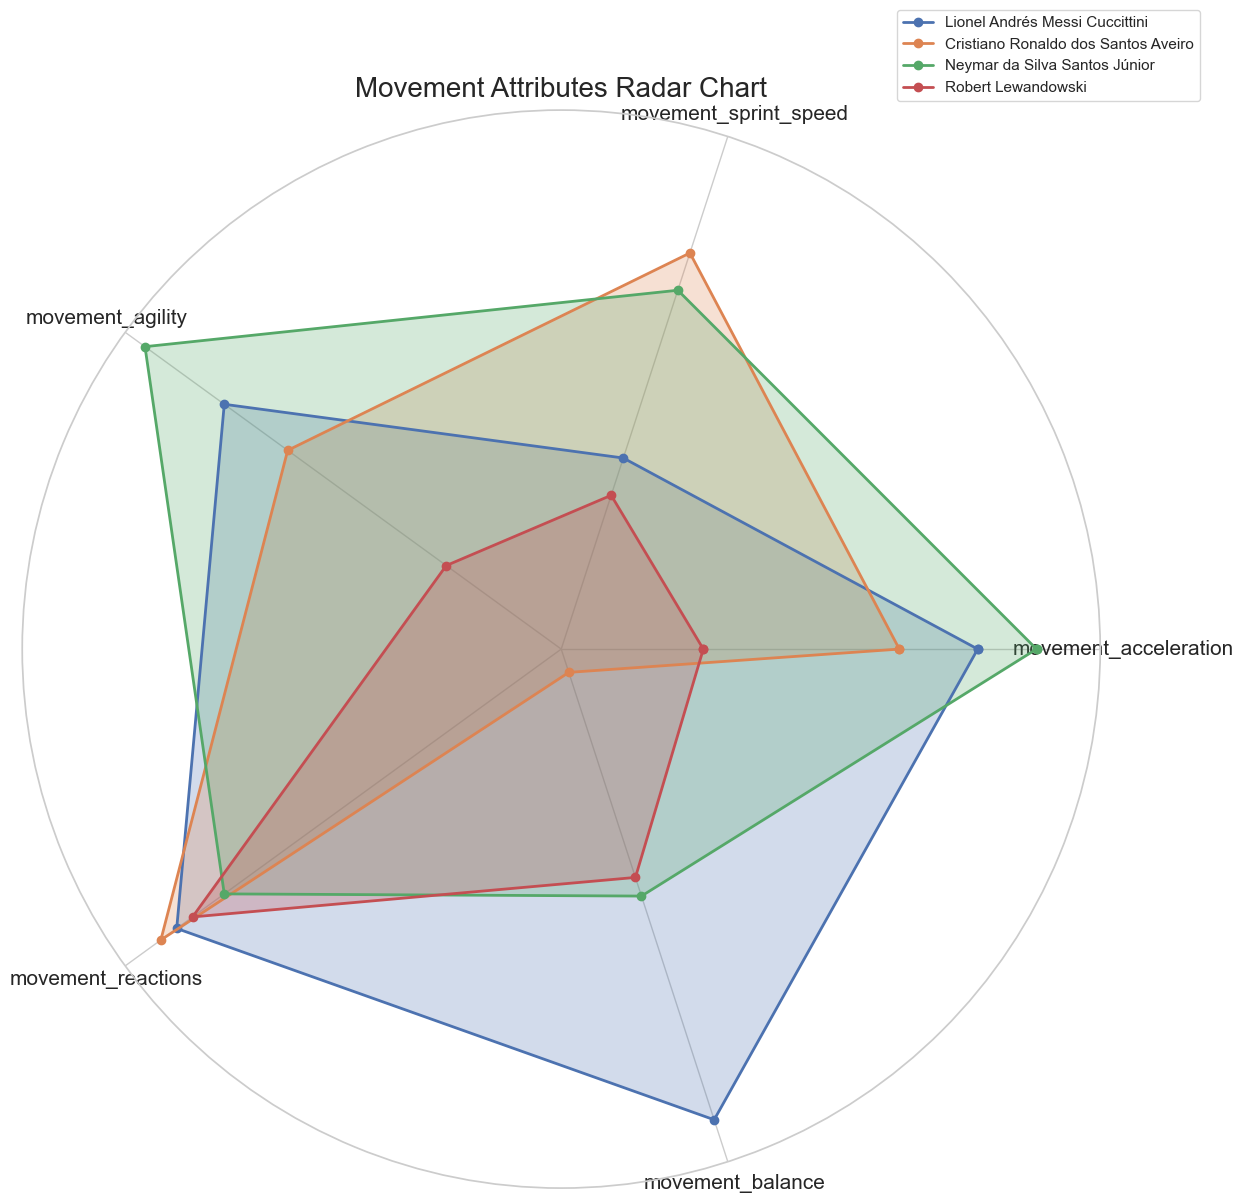

In [29]:
# List of player names of interest
players_of_interest = [
    'Lionel Andrés Messi Cuccittini', 
    'Cristiano Ronaldo dos Santos Aveiro', 
    'Neymar da Silva Santos Júnior', 
    'Robert Lewandowski'
]

# Filter the dataset for these players
players_df = df[df['long_name'].isin(players_of_interest)]

# Select relevant columns for movement attributes
movement_attributes = [
    'movement_acceleration',
    'movement_sprint_speed',
    'movement_agility',
    'movement_reactions',
    'movement_balance'
]

# Prepare data for radar chart
def get_radar_data(df, players, attributes):
    data = {}
    for player in players:
        player_data = df[df['long_name'] == player][attributes].values.flatten()
        data[player] = player_data
    return data

def plot_radar_chart(data, attributes):
    num_vars = len(attributes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))
    
    for player, values in data.items():
        values = np.concatenate((values, [values[0]]))
        ax.plot(angles, values, label=player, linewidth=2, linestyle='solid', marker='o')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title('Movement Attributes Radar Chart', fontsize=20)
    plt.show()

# Get radar data
radar_data = get_radar_data(players_df, players_of_interest, movement_attributes)

# Plot radar chart
plot_radar_chart(radar_data, movement_attributes)

###  <i>========= Power Attributes Radar Chart ============= </i>

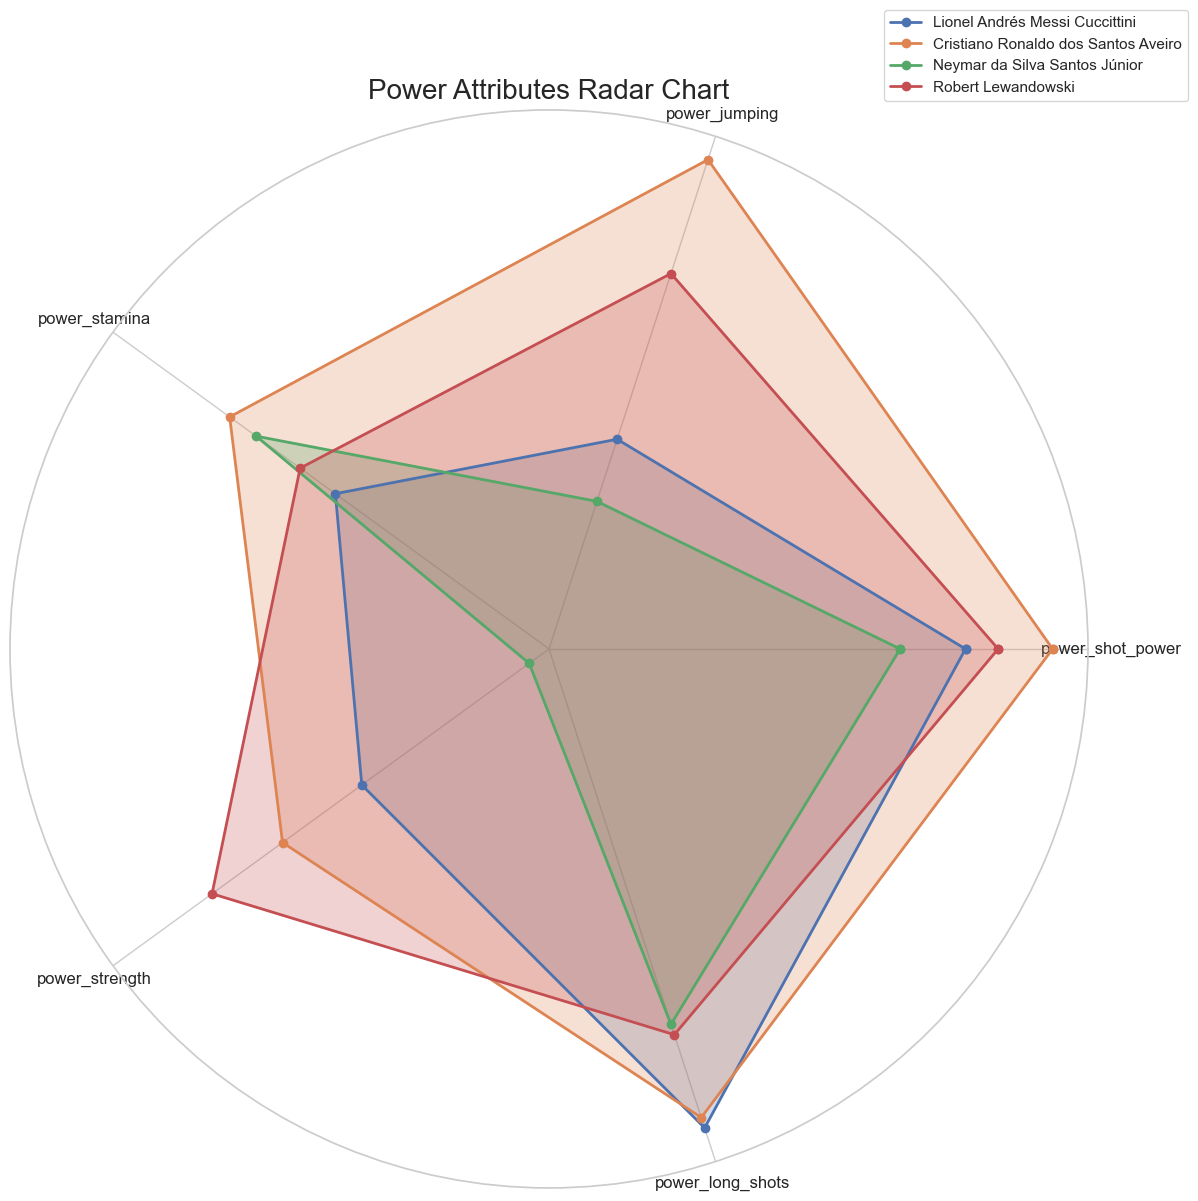

In [30]:
# List of player names of interest
players_of_interest = [
    'Lionel Andrés Messi Cuccittini', 
    'Cristiano Ronaldo dos Santos Aveiro', 
    'Neymar da Silva Santos Júnior', 
    'Robert Lewandowski'
]

# Filter the dataset for these players
players_df = df[df['long_name'].isin(players_of_interest)]

# Select relevant columns for power attributes
power_attributes = [
    'power_shot_power',
    'power_jumping',
    'power_stamina',
    'power_strength',
    'power_long_shots'
]

# Prepare data for radar chart
def get_radar_data(df, players, attributes):
    data = {}
    for player in players:
        player_data = df[df['long_name'] == player][attributes].values.flatten()
        data[player] = player_data
    return data

def plot_radar_chart(data, attributes):
    num_vars = len(attributes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))
    
    for player, values in data.items():
        values = np.concatenate((values, [values[0]]))
        ax.plot(angles, values, label=player, linewidth=2, linestyle='solid', marker='o')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=12)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title('Power Attributes Radar Chart', fontsize=20)
    plt.show()

# Get radar data
radar_data = get_radar_data(players_df, players_of_interest, power_attributes)

# Plot radar chart
plot_radar_chart(radar_data, power_attributes)


###  ========== <i> Mentality Attributes Radar Chart ============ </i> 

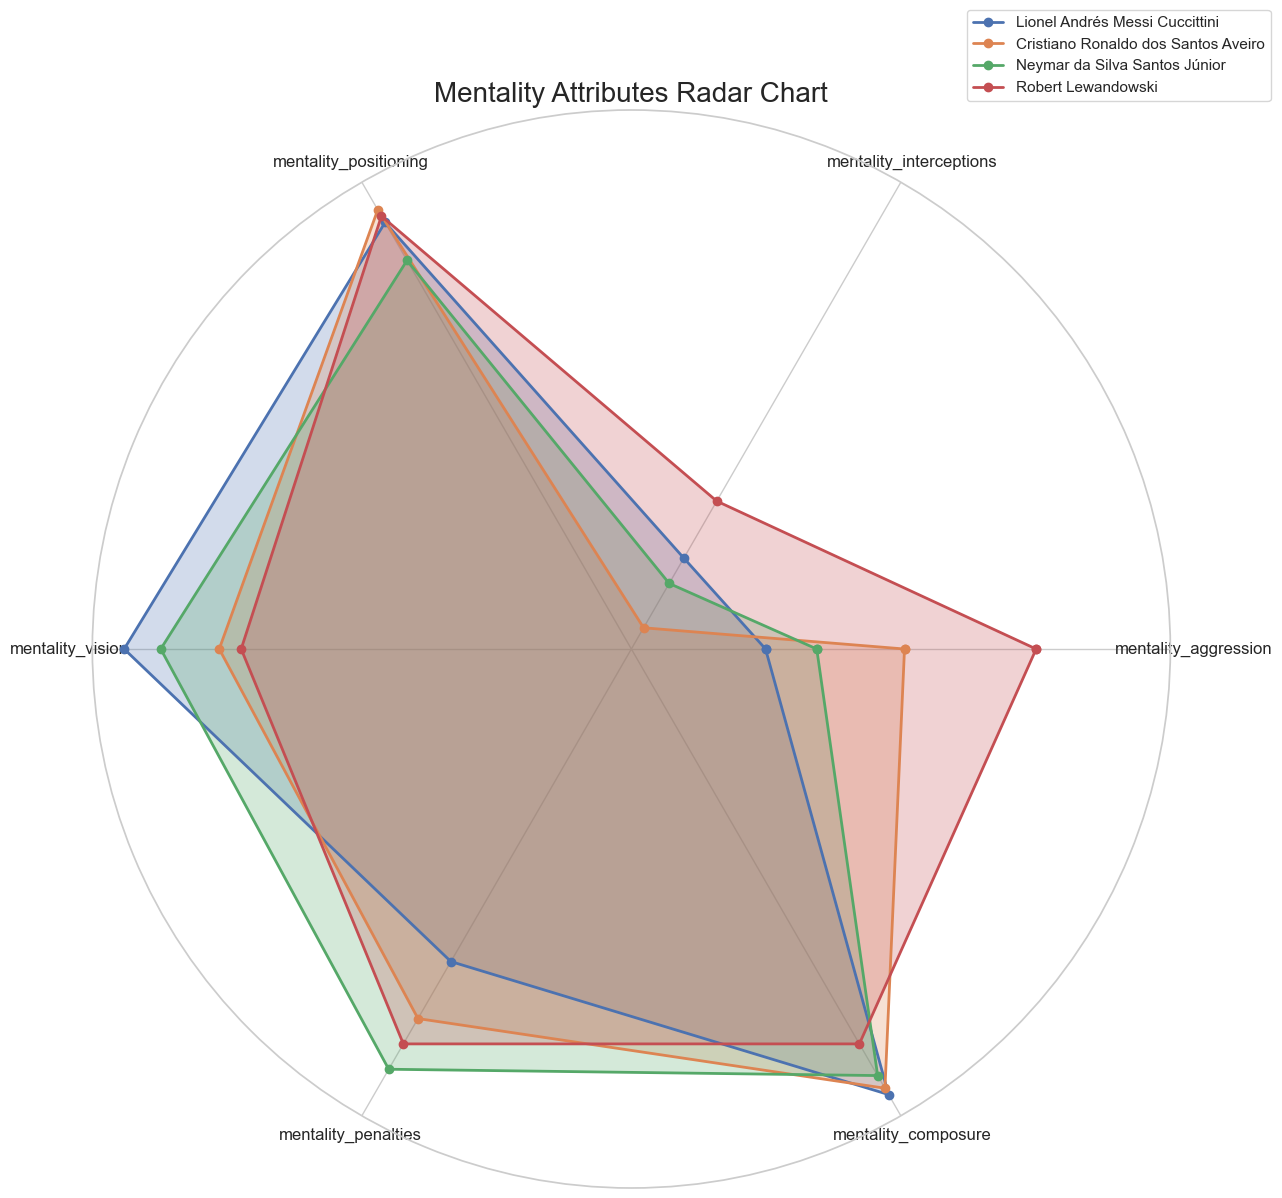

In [31]:
# List of player names of interest
players_of_interest = [
    'Lionel Andrés Messi Cuccittini', 
    'Cristiano Ronaldo dos Santos Aveiro', 
    'Neymar da Silva Santos Júnior', 
    'Robert Lewandowski'
]

# Filter the dataset for these players
players_df = df[df['long_name'].isin(players_of_interest)]

# Select relevant columns for mentality attributes
mentality_attributes = [
    'mentality_aggression',
    'mentality_interceptions',
    'mentality_positioning',
    'mentality_vision',
    'mentality_penalties',
    'mentality_composure'
]

# Prepare data for radar chart
def get_radar_data(df, players, attributes):
    data = {}
    for player in players:
        player_data = df[df['long_name'] == player][attributes].values.flatten()
        data[player] = player_data
    return data

def plot_radar_chart(data, attributes):
    num_vars = len(attributes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))
    
    for player, values in data.items():
        values = np.concatenate((values, [values[0]]))
        ax.plot(angles, values, label=player, linewidth=2, linestyle='solid', marker='o')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=12)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title('Mentality Attributes Radar Chart', fontsize=20)
    plt.show()

# Get radar data
radar_data = get_radar_data(players_df, players_of_interest, mentality_attributes)

# Plot radar chart
plot_radar_chart(radar_data, mentality_attributes)

### <i>========== Top 10 Players by Shoothing, Defending, Passing & Dribbling ========== </i>

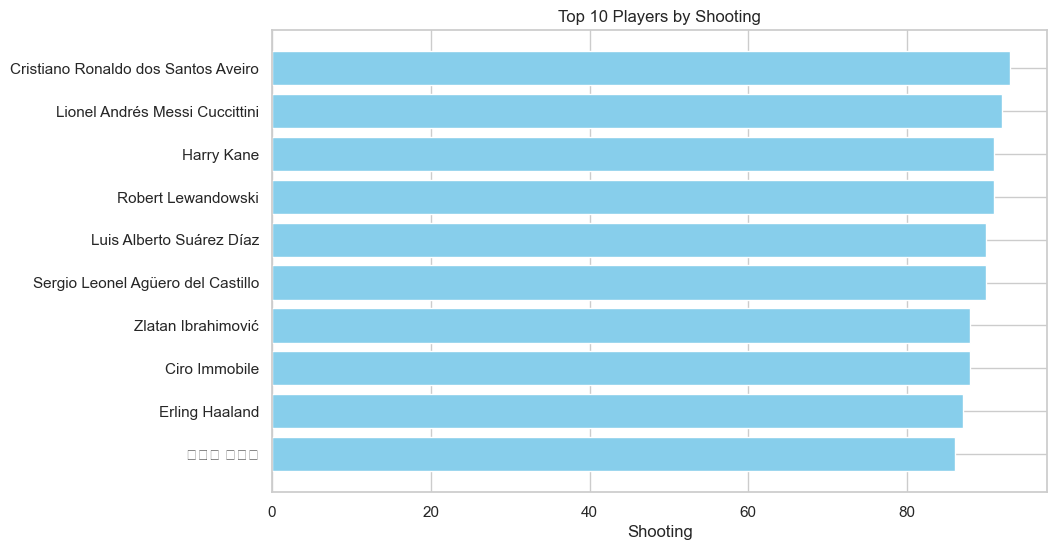

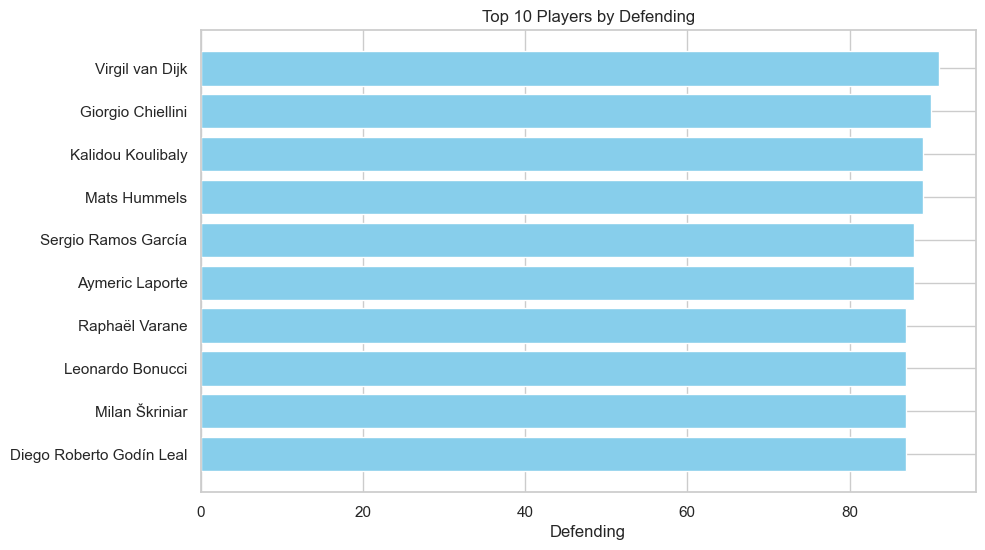

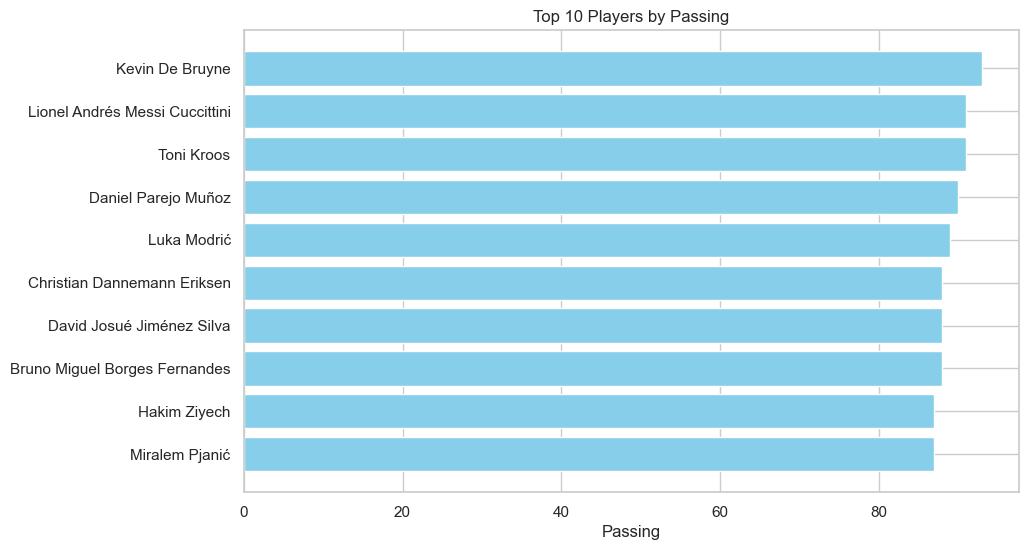

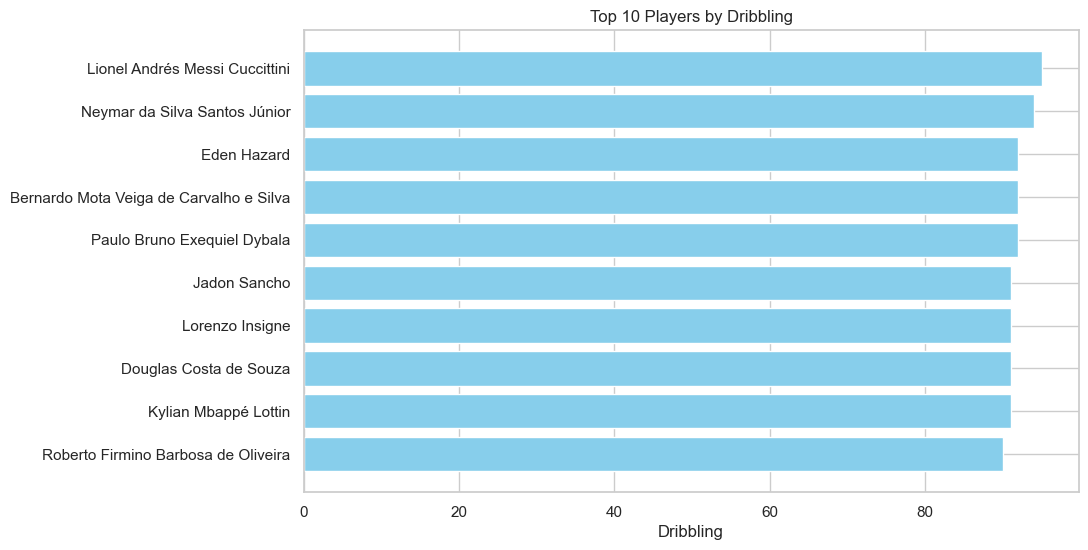

In [32]:
# Define the categories and their corresponding columns
categories = {
    'Shooting': 'shooting',
    'Defending': 'defending',
    'Passing': 'passing',
    'Dribbling': 'dribbling'
}

# Create a function to plot the top 10 players for a given category
def plot_top_players(df, category_name, category_column):
    top_players = df[['long_name', category_column]].sort_values(by=category_column, ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_players['long_name'], top_players[category_column], color='skyblue')
    plt.xlabel(category_name)
    plt.title(f'Top 10 Players by {category_name}')
    plt.gca().invert_yaxis()
    plt.show()

# Plot for each category
for category_name, category_column in categories.items():
    plot_top_players(df, category_name, category_column)


###  <i>========== Top 5 Players By Value  ==========</i>

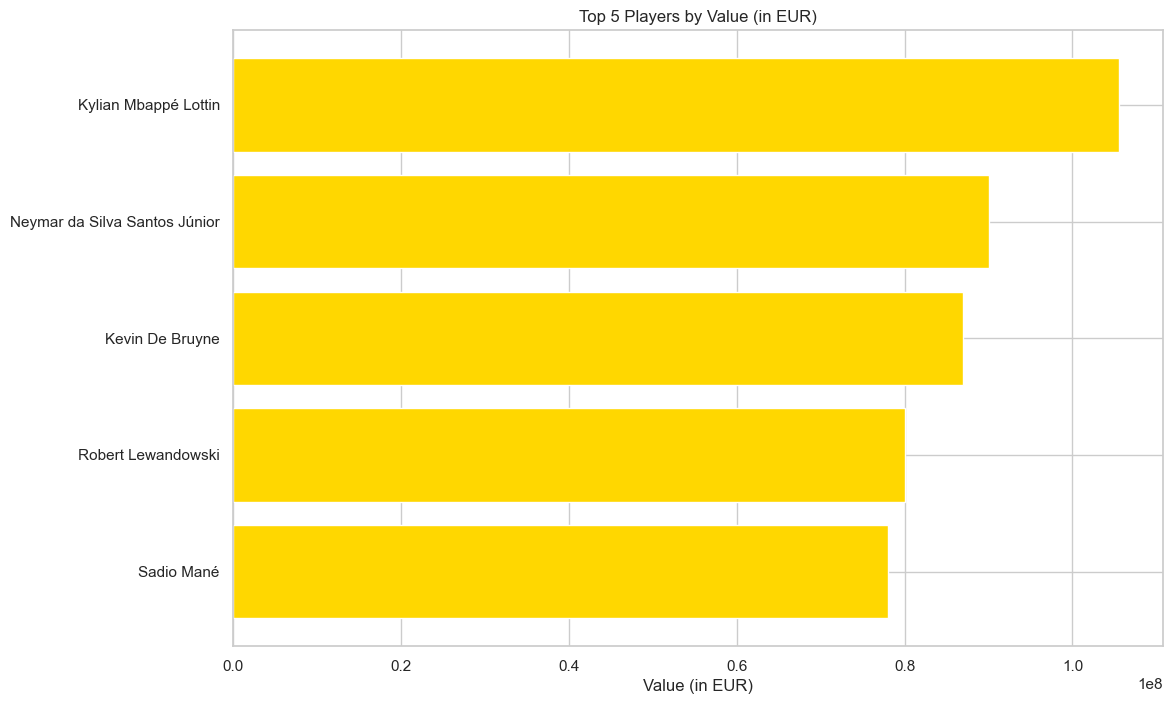

In [33]:
# Find the top 5 players with the highest value_eur
top_5_players = df[['long_name', 'value_eur']].sort_values(by='value_eur', ascending=False).head(5)

# Plot the results
plt.figure(figsize=(12, 8))
plt.barh(top_5_players['long_name'], top_5_players['value_eur'], color='gold')
plt.xlabel('Value (in EUR)')
plt.title('Top 5 Players by Value (in EUR)')
plt.gca().invert_yaxis()
plt.show()

###  <i>========== Number Of Players With Normal Body Type Vs Other Body Types ========== </i>

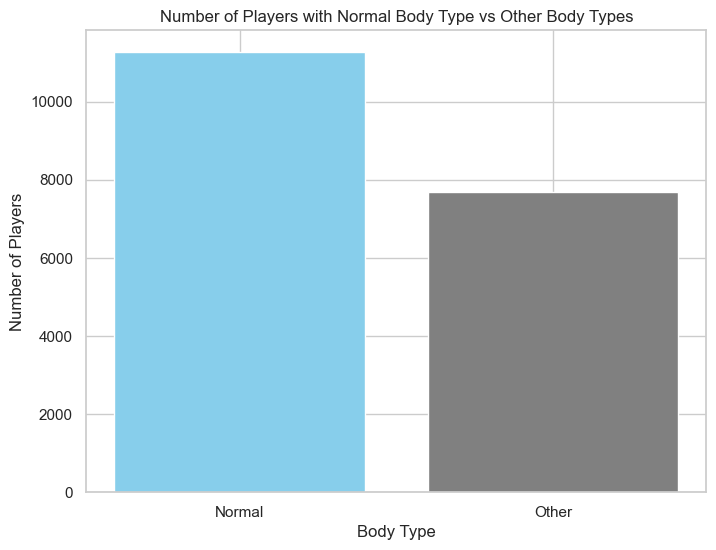

In [34]:
# Count the number of players with 'Normal' body type
normal_body_type_count = df[df['body_type'] == 'Normal'].shape[0]

# Create a DataFrame for visualization
body_type_counts = pd.DataFrame({
    'Body Type': ['Normal', 'Other'],
    'Count': [normal_body_type_count, df.shape[0] - normal_body_type_count]
})

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(body_type_counts['Body Type'], body_type_counts['Count'], color=['skyblue', 'grey'])
plt.xlabel('Body Type')
plt.ylabel('Number of Players')
plt.title('Number of Players with Normal Body Type vs Other Body Types')
plt.show()

###   <i>========== Top 10 Players With Best Physic =========</i>

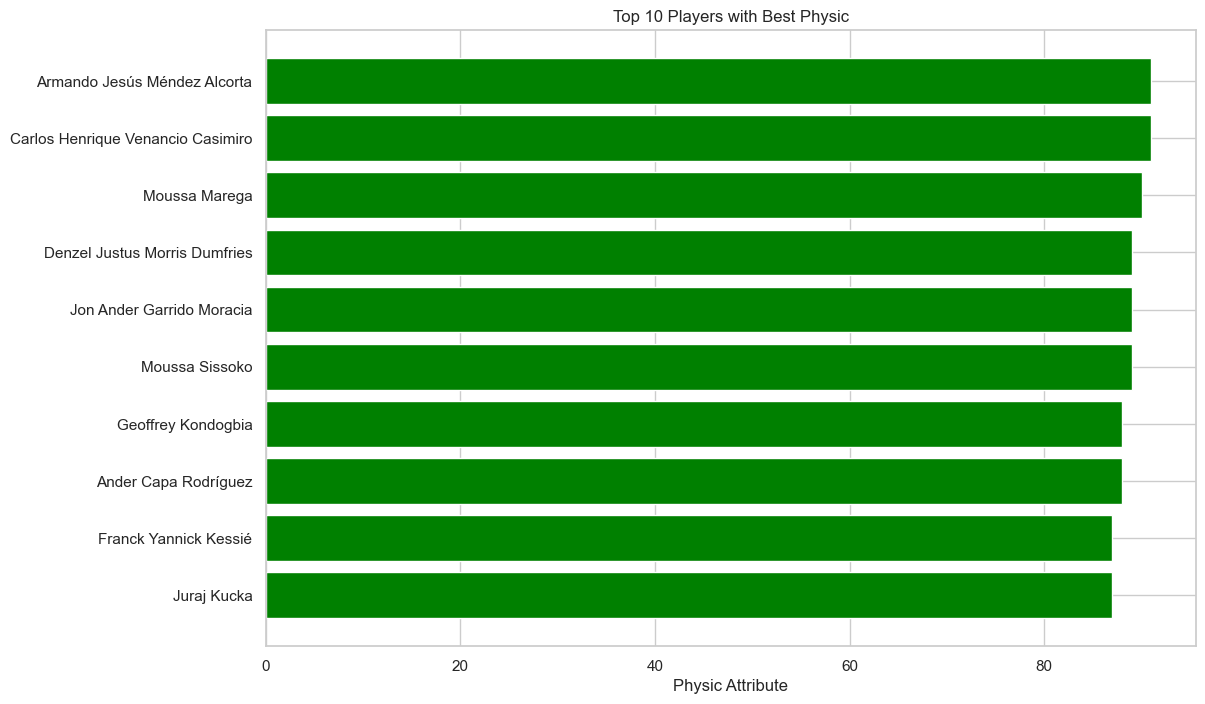

In [35]:
# Ensure 'physic' column exists
if 'physic' in df.columns:
    # Find the top 10 players with the best physic
    top_10_physic = df[['long_name', 'physic']].sort_values(by='physic', ascending=False).head(10)

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.barh(top_10_physic['long_name'], top_10_physic['physic'], color='green')
    plt.xlabel('Physic Attribute')
    plt.title('Top 10 Players with Best Physic')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("The 'physic' column is not present in the DataFrame.")

###   <i>========== Top 5 Best Football Players Attributes ========== </i>

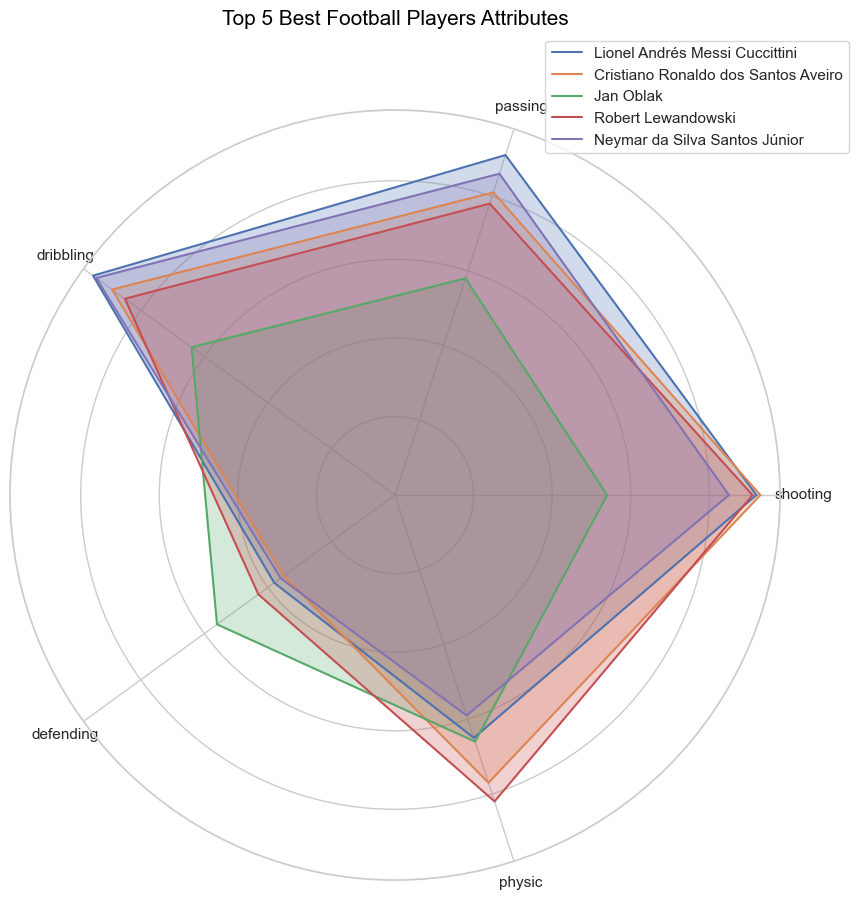

In [36]:
# Ensure 'overall' column exists
if 'overall' in df.columns:
    # Find the top 5 players with the best overall rating
    top_5_players = df[['long_name', 'overall', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].sort_values(by='overall', ascending=False).head(5)

    # Radar chart setup
    def radar_chart(data, categories, title):
        # Number of variables
        num_vars = len(categories)

        # Compute angle for each category
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]  # Complete the loop

        # Create plot
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

        for i, row in data.iterrows():
            values = row[categories].values.tolist()
            values += values[:1]  # Complete the loop
            ax.plot(angles, values, label=row['long_name'])
            ax.fill(angles, values, alpha=0.25)

        # Labels for each category
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)

        # Title and legend
        plt.title(title, size=15, color='black', y=1.1)
        plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

        plt.show()

    # Define categories for radar chart
    categories = ['shooting', 'passing', 'dribbling', 'defending', 'physic']
    radar_chart(top_5_players, categories, 'Top 5 Best Football Players Attributes')

else:
    print("The 'overall' column is not present in the DataFrame.")

###   <i>===========Top 5 Players Comparison Across Attributes ==========</i>

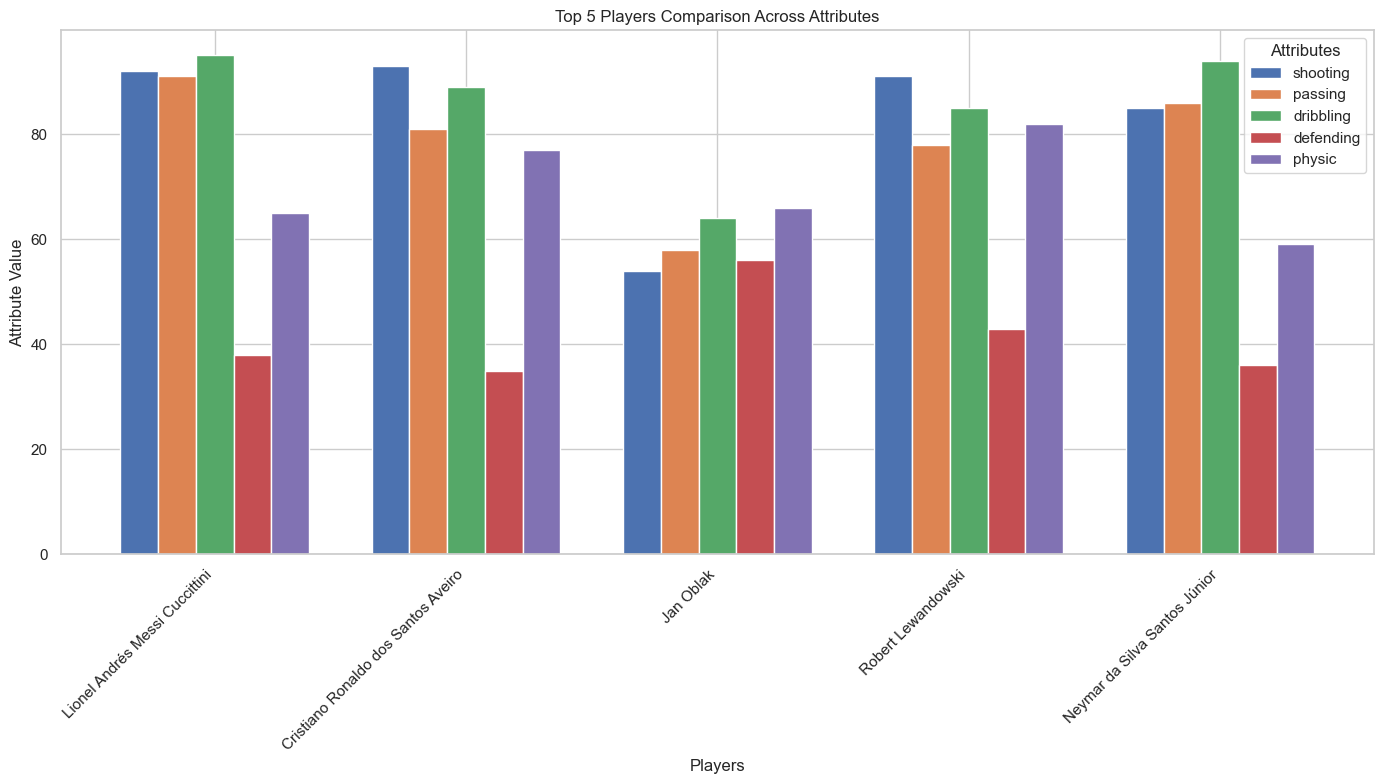

In [37]:

# Ensure 'overall' column exists
if 'overall' in df.columns:
    # Find the top 5 players with the best overall rating
    top_5_players = df[['long_name', 'overall', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].sort_values(by='overall', ascending=False).head(5)

    # Plotting
    def plot_top_players_comparison(data, categories):
        num_players = len(data)
        bar_width = 0.15
        index = np.arange(num_players)
        
        # Plot for each attribute
        fig, ax = plt.subplots(figsize=(14, 8))
        
        for i, category in enumerate(categories):
            values = data[category].values
            ax.bar(index + i * bar_width, values, bar_width, label=category)

        # Add labels, title and customize ticks
        ax.set_xlabel('Players')
        ax.set_ylabel('Attribute Value')
        ax.set_title('Top 5 Players Comparison Across Attributes')
        ax.set_xticks(index + bar_width * (len(categories) / 2 - 0.5))
        ax.set_xticklabels(data['long_name'], rotation=45, ha='right')
        ax.legend(title='Attributes')
        
        plt.tight_layout()
        plt.show()

    # Define categories for comparison
    categories = ['shooting', 'passing', 'dribbling', 'defending', 'physic']
    plot_top_players_comparison(top_5_players, categories)

else:
    print("The 'overall' column is not present in the DataFrame.")


###  <i>========== Top 10 Best Football Players Attributes =========== </i>

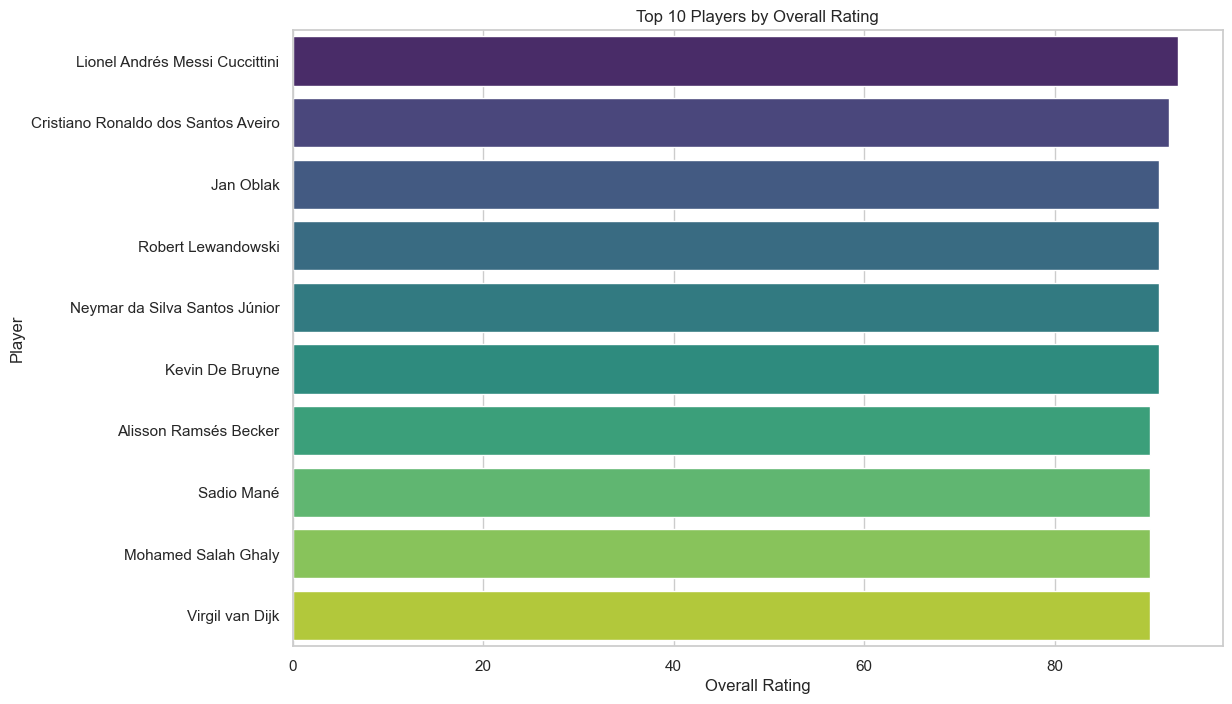

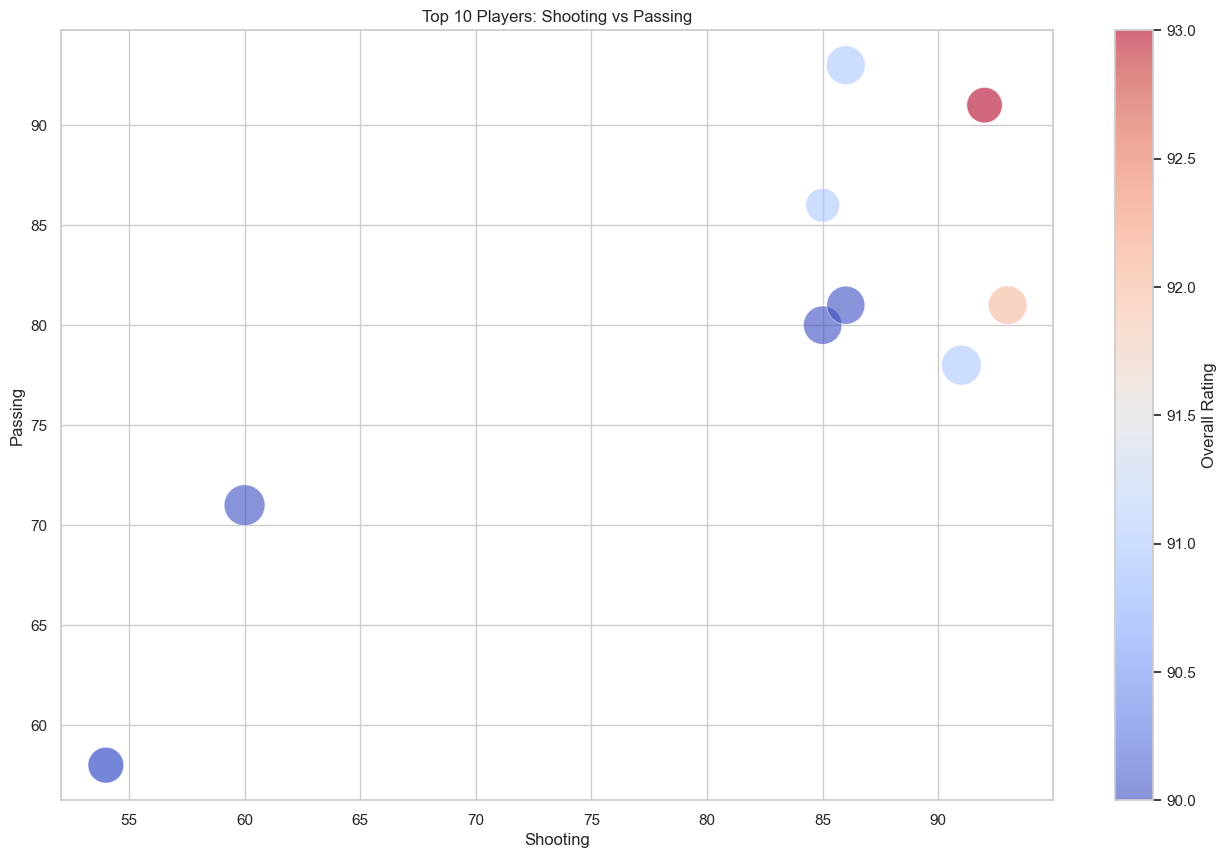

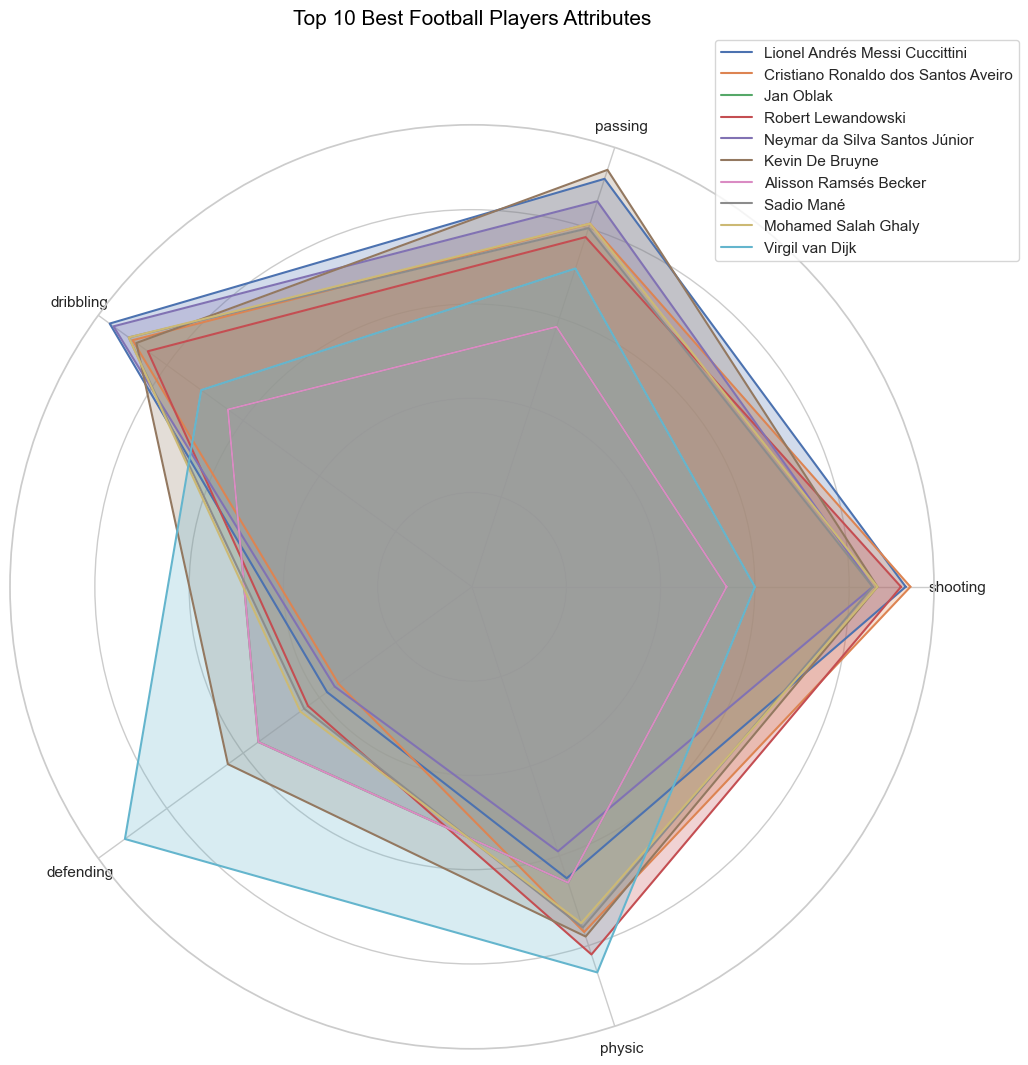

In [38]:
# Ensure 'overall' column exists
if 'overall' in df.columns:
    # Find the top 10 players with the best overall rating
    top_10_players = df[['long_name', 'overall', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].sort_values(by='overall', ascending=False).head(10)

    # Bar Chart: Overall Ratings
    plt.figure(figsize=(12, 8))
    sns.barplot(x='overall', y='long_name', data=top_10_players, palette='viridis')
    plt.title('Top 10 Players by Overall Rating')
    plt.xlabel('Overall Rating')
    plt.ylabel('Player')
    plt.show()

    # Bubble Chart: Multiple Metrics
    plt.figure(figsize=(16, 10))
    scatter = plt.scatter(
        x=top_10_players['shooting'],
        y=top_10_players['passing'],
        s=top_10_players['physic'] * 10,  # Bubble size proportional to 'physic'
        alpha=0.6,
        c=top_10_players['overall'],
        cmap='coolwarm',
        edgecolors='w',
        linewidth=0.5
    )
    plt.colorbar(scatter, label='Overall Rating')
    plt.title('Top 10 Players: Shooting vs Passing')
    plt.xlabel('Shooting')
    plt.ylabel('Passing')
    plt.grid(True)
    plt.show()

    # Radar Chart as a third unique visualization
    def radar_chart(data, categories, title):
        num_vars = len(categories)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

        for i, row in data.iterrows():
            values = row[categories].values.tolist()
            values += values[:1]
            ax.plot(angles, values, label=row['long_name'])
            ax.fill(angles, values, alpha=0.25)

        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)

        plt.title(title, size=15, color='black', y=1.1)
        plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

        plt.show()

    categories = ['shooting', 'passing', 'dribbling', 'defending', 'physic']
    radar_chart(top_10_players, categories, 'Top 10 Best Football Players Attributes')

else:
    print("The 'overall' column is not present in the DataFrame.")


# OUTLIERS

In [39]:
# Function to identify outliers using IQR
def remove_outliers_iqr(df, columns):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    is_outlier = (df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))
    return df[~is_outlier.any(axis=1)]

##  <i>Function to Identify and Remove Outliers Using IQR</i>

### <i> Breakdown </i>$

- **`def remove_outliers_iqr(df, columns):`**
  - Defines a function `remove_outliers_iqr` that takes two parameters: 
    - `df`: The DataFrame containing the data.
    - `columns`: A list of column names where outliers need to be identified and removed.

- **`Q1 = df[columns].quantile(0.25)`**
  - Calculates the first quartile (25th percentile) for each column in the `columns` list. 
  - `Q1` is the boundary below which 25% of the data falls.

- **`Q3 = df[columns].quantile(0.75)`**
  - Calculates the third quartile (75th percentile) for each column in the `columns` list. 
  - `Q3` is the boundary above which 25% of the data falls.

- **`IQR = Q3 - Q1`**
  - Computes the Interquartile Range (IQR) for each column. 
  - The IQR measures the range of the middle 50% of the data and is used to detect outliers. Outliers are typically values that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

- **`is_outlier = (df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))`**
  - Identifies outliers by checking whether the data in each column falls outside the range defined by `Q1 - 1.5 * IQR` and `Q3 + 1.5 * IQR`. 
  - If a value is smaller than `Q1 - 1.5 * IQR` or greater than `Q3 + 1.5 * IQR`, it is considered an outlier.

- **`return df[~is_outlier.any(axis=1)]`**
  - Removes the rows containing outliers from the DataFrame.
  - `~is_outlier.any(axis=1)` returns rows where no outlier is present in any of the specified columns.
  - The function returns a DataFrame with outliers removed.

### <i> Summary </i>
 
This function calculates the Interquartile Range (IQR) for specified columns in a DataFrame and uses it to identify and remove rows containing outliers. The IQR is a robust method for detecting outliers, as it focuses on the middle 50% of the data, making it less sensitive to extreme values.


In [40]:
# Columns to check for outliers
columns_to_check = [
    'age', 'height_cm', 'weight_kg', 'overall', 'potential', 
    'value_eur', 'wage_eur', 'international_reputation', 
    'weak_foot', 'skill_moves', 'team_jersey_number', 'pace', 
    'shooting', 'passing', 'dribbling', 'defending', 'physic', 
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
    'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
    'movement_agility', 'movement_reactions', 'movement_balance', 
    'power_shot_power', 'power_jumping', 'power_stamina', 
    'power_strength', 'power_long_shots', 'mentality_aggression', 
    'mentality_interceptions', 'mentality_positioning', 
    'mentality_vision', 'mentality_penalties', 'mentality_composure', 
    'defending_standing_tackle', 'defending_sliding_tackle', 
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
    'goalkeeping_positioning', 'goalkeeping_reflexes'
]

# Remove outliers
df= remove_outliers_iqr(df, columns_to_check)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7461 entries, 359 to 18919
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   long_name                   7461 non-null   object 
 1   age                         7461 non-null   int64  
 2   dob                         7461 non-null   object 
 3   height_cm                   7461 non-null   int64  
 4   weight_kg                   7461 non-null   int64  
 5   nationality                 7461 non-null   object 
 6   club_name                   7461 non-null   object 
 7   league_name                 7461 non-null   object 
 8   league_rank                 7461 non-null   float64
 9   overall                     7461 non-null   int64  
 10  potential                   7461 non-null   int64  
 11  value_eur                   7461 non-null   int64  
 12  wage_eur                    7461 non-null   int64  
 13  player_positions            7461 no

# MODELING 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [43]:
# Define target variable and features
target_column = 'value_eur'  # Example target column; replace as needed
X = df.drop(columns=[target_column, 'long_name'])  # Drop target and non-numeric columns
y = df[target_column]

##  <i> Defining the Target Variable and Features </i>

###  <i> Breakdown </i>

- **`target_column = 'value_eur'`**
  - Defines the target variable, which is the column you want to predict. 
  - In this example, `value_eur` is used as the target column, but it can be replaced with another column depending on the dataset.

- **`X = df.drop(columns=[target_column, 'long_name'])`**
  - Creates the feature matrix `X` by dropping specific columns from the DataFrame `df`:
    - `target_column` (`value_eur`) is dropped because it is the target variable, and we don't want it to be included as a feature.
    - `'long_name'` is dropped because it's a non-numeric column that is irrelevant for model training (typically text or an identifier).
  - The remaining columns in the DataFrame become the features used for training the model.

- **`y = df[target_column]`**
  - Assigns the target variable to `y`, which is the column `value_eur`. 
  - `y` contains the values that the model will be trained to predict.

### <i> Summary </i>

This code snippet separates the dataset into features (`X`) and the target variable (`y`). The feature matrix `X` contains all relevant columns for model training, excluding the target column (`value_eur`) and any non-numeric columns like `'long_name'`. The target variable `y` contains the values that the model will aim to predict.


In [44]:
# Encode categorical variables and standardize numerical features
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### <i> Summary </i>

This code snippet:
1. **Encodes categorical variables** using one-hot encoding, converting them into numerical values.
2. **Standardizes numerical features** to ensure that all features contribute equally to the model. The resulting matrix `X_scaled` can be used for model training, with all features scaled to the same range.

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Linear Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_linear)}")

Linear Regression Performance:
Mean Absolute Error: 7.416647469840992e+19
Mean Squared Error: 2.1557712605548669e+40
R^2 Score: -3.647577870118726e+28


## <i> Linear Regression Performance Evaluation </i>

### <i> Metrics: </i>

1. **Mean Absolute Error (MAE)**: `7.416647469840992e+19`
   - **Description**: MAE measures the average magnitude of errors in the predictions. It is the average of the absolute differences between actual values and predicted values.
   - **Interpretation**: The higher this number, the less accurate the model. In this case, the value is extremely high, indicating poor model performance.

2. **Mean Squared Error (MSE)**: `2.1557712605548669e+40`
   - **Description**: MSE calculates the average squared differences between actual and predicted values. Squaring the differences emphasizes larger errors more than MAE.
   - **Interpretation**: A very high MSE value means the model is making significant errors in its predictions.

3. **R² Score**: `-3.647577870118726e+28`
   - **Description**: The R² score represents the proportion of variance in the target variable that is explained by the features. It ranges from 0 to 1, where 1 indicates a perfect fit, and 0 means the model explains none of the variance.
   - **Interpretation**: A negative R² score suggests that the model performs worse than a simple baseline (mean of the target variable), indicating very poor performance.

### <i> Summary: </i>
The extremely high MAE and MSE values, along with the negative R² score, indicate that the linear regression model is performing very poorly. The model's predictions deviate significantly from the actual values, and the negative R² implies that it fails to capture any meaningful relationships between the features and the target variable.


In [59]:
# Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Random Forest Performance")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")

Random Forest Performance
Mean Absolute Error: 33844.23978566645
Mean Squared Error: 6688894573.007368
R^2 Score: 0.9886823503650479


## <i>Random Forest Performance Evaluation</i>

### <i> Metrics:</i>

1. **Mean Absolute Error (MAE)**: `33,844.24`
   - **Description**: MAE represents the average magnitude of errors in the model's predictions. It is the mean of the absolute differences between the actual values and the predicted values.
   - **Interpretation**: A relatively low MAE indicates that the model's predictions are fairly close to the actual values.

2. **Mean Squared Error (MSE)**: `6,688,894,573.01`
   - **Description**: MSE measures the average squared difference between actual and predicted values, with larger errors having a more significant impact than smaller ones.
   - **Interpretation**: While the MSE is larger than the MAE (due to the squaring of errors), it is still relatively low, indicating good predictive performance.

3. **R² Score**: `0.9887`
   - **Description**: The R² score indicates how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit.
   - **Interpretation**: With an R² score of 0.9887, the Random Forest model explains approximately 98.87% of the variance in the target variable, indicating a very strong fit to the data.

### <i> Summary:</i>
The Random Forest model demonstrates strong predictive performance with a low MAE and MSE, and a very high R² score close to 1. This suggests that the model is highly effective at capturing the relationship between the features and the target variable, making accurate predictions.


In [49]:
from sklearn.svm import SVR

# Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [50]:
print("\nSupport Vector Machine Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_svm)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svm)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_svm)}")


Support Vector Machine Performance:
Mean Absolute Error: 503273.6430423962
Mean Squared Error: 653465500533.1777
R^2 Score: -0.10566753636811055


## <i>Support Vector Machine (SVM) Performance EvaluationM</i>

### <i>Metrics:</i>

1. **Mean Absolute Error (MAE)**: `503,273.64`
   - **Description**: MAE represents the average magnitude of errors in the model's predictions. It calculates the mean of the absolute differences between the actual and predicted values.
   - **Interpretation**: A high MAE value indicates that the model's predictions are significantly off from the actual values.

2. **Mean Squared Error (MSE)**: `653,465,500,533.18`
   - **Description**: MSE measures the average squared difference between actual and predicted values, placing more weight on larger errors.
   - **Interpretation**: The very high MSE indicates large prediction errors, showing that the model is not performing well.

3. **R² Score**: `-0.106`
   - **Description**: The R² score measures how well the model explains the variance in the target variable. A score below 0 indicates that the model performs worse than a simple mean-based prediction.
   - **Interpretation**: An R² score of -0.106 means the SVM model is performing poorly, even worse than a baseline model predicting the mean.

### <i> Summary:</i>
The SVM model shows poor performance with high error rates (MAE and MSE) and a negative R² score, indicating that the model does not fit the data well and struggles to predict the target variable accurately. Significant improvements or adjustments are needed for better performance.


In [51]:
# Assuming you have already computed y_pred_linear, y_pred_rf, and y_pred_svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Support Vector Machine
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Determine the best model for each metric
best_r2_model = max(r2_linear, r2_rf, r2_svm)
best_mae_model = min(mae_linear, mae_rf, mae_svm)
best_mse_model = min(mse_linear, mse_rf, mse_svm)

print(f"Best Model on R²: {'Linear Regression' if best_r2_model == r2_linear else 'Random Forest' if best_r2_model == r2_rf else 'SVM'}")
print(f"Best Model on MAE: {'Linear Regression' if best_mae_model == mae_linear else 'Random Forest' if best_mae_model == mae_rf else 'SVM'}")
print(f"Best Model on MSE: {'Linear Regression' if best_mse_model == mse_linear else 'Random Forest' if best_mse_model == mse_rf else 'SVM'}")


Best Model on R²: Random Forest
Best Model on MAE: Random Forest
Best Model on MSE: Random Forest


## <i>Model Performance Summary</i>

###  <i>Best Performing Model</i>

- **Best Model on R² Score**: **Random Forest**
  - **R² Score**: `0.9887`
  - **Description**: The Random Forest model has the highest R² score, indicating it explains the most variance in the target variable compared to other models.

- **Best Model on Mean Absolute Error (MAE)**: **Random Forest**
  - **MAE**: `33,844.24`
  - **Description**: Random Forest has the lowest MAE, showing it has the smallest average error between the actual and predicted values.

- **Best Model on Mean Squared Error (MSE)**: **Random Forest**
  - **MSE**: `6,688,894,573.01`
  - **Description**: Random Forest also performs best on MSE, reflecting fewer large errors compared to other models.

### <i>Summary</i>
The Random Forest model outperforms other models across all key performance metrics: R² score, MAE, and MSE. This indicates that it is the most accurate and reliable model among those evaluated for this dataset.


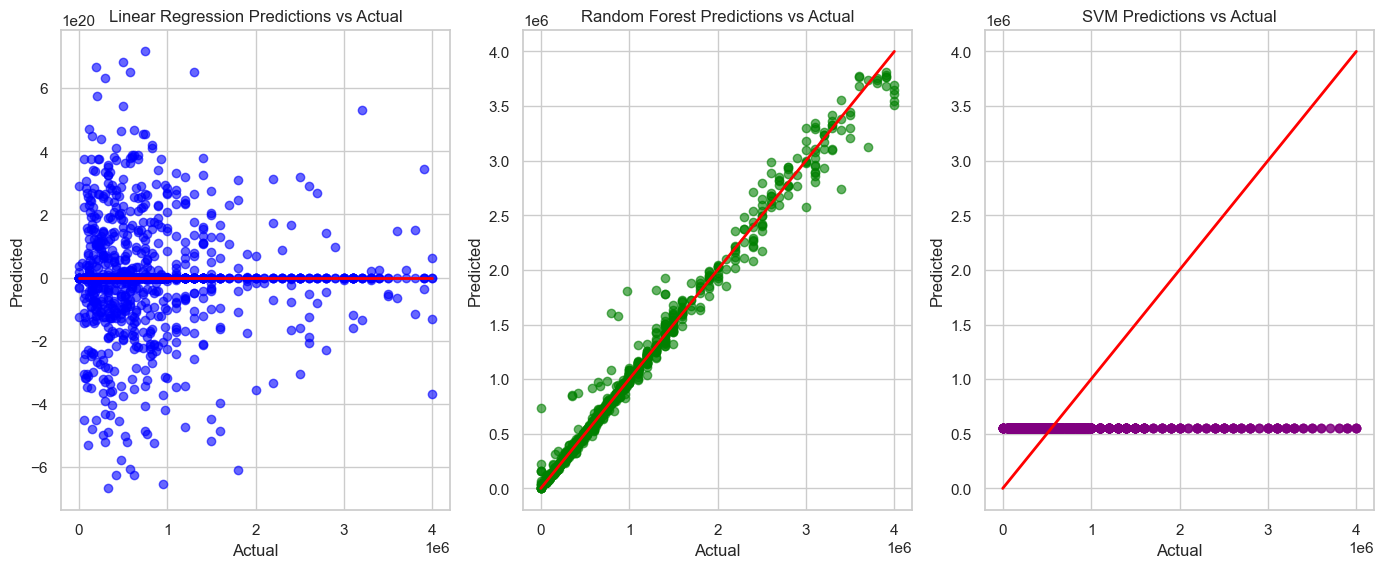

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# SVM Predictions vs Actual
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_svm, color="purple", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
plt.title('SVM Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


### 1. Linear Regression (Left Graph)
- **Description**: Each blue dot represents a test data point, where the x-axis shows the actual values from the test set, and the y-axis shows the values predicted by the Linear Regression model.
- **Observations**:
  - The red line represents the ideal situation where predicted values perfectly match the actual values (i.e., a perfect model would have all points along this red line).
  - Most predictions deviate widely from the red line, with many predictions being extremely large in magnitude (some dots are way above or below). This suggests poor performance on this dataset.
  - The large spread of data points indicates the model fails to capture the relationship between the features and the target variable, producing many inaccurate predictions.
  - The predicted values on the y-axis show values like `1e20`, which suggests the model may have encountered numerical instability, leading to unreasonably large predictions.

### 2. Random Forest (Middle Graph)
- **Description**: Green dots represent the predictions of the Random Forest model compared to the actual values on the x-axis.
- **Observations**:
  - In contrast to the Linear Regression plot, most points are very close to the red line, indicating that the Random Forest model predicts values close to the actual values.
  - The alignment of dots with the red line implies the model is capturing the underlying patterns in the data well.
  - A few outliers still exist, where predictions deviate, but overall, this model performs significantly better than Linear Regression.

### 3. SVM (Right Graph)
- **Description**: Purple dots represent the predictions of the Support Vector Machine model compared to the actual values.
- **Observations**:
  - All purple dots are clustered in a horizontal line, meaning the SVM model predicts almost the same value for all instances, regardless of the actual values.
  - This behavior indicates the SVM model is likely not suitable for this dataset, as it appears to be **underfitting**. The model fails to learn the relationship between features and the target, predicting nearly the same value for all test points.
  - The red line, representing perfect predictions, shows that none of the predicted values come close to the actual values, indicating very poor performance for this model.

### Overall Interpretation:
- **Linear Regression**: The model seems to be making extremely large and inaccurate predictions, suggesting poor fit and possibly numerical issues.
- **Random Forest**: This model performs the best out of the three, with most predictions closely aligned with actual values. The fit is much better, but there may still be room for improvement.
- **SVM**: The SVM model is **underfitting** the data, predicting almost the same value for all test points, and fails to capture any meaningful patterns in the data.
